# Рекомендательные системы

Сегодня мы познакомимся с одним из самых прикладных и динамично развивающихся направлений машинного обучения – рекомендательными системами.

**Рекомендательные системы** – это совокупность методов и алоритмов, задача которых заключается в том, чтобы предсказать какие объекты/сущности (фильмы, книги, товары и т.д.) будут интересны пользователю на основе данных о самом пользователе и объектах.

Когда говорят о качестве рекомендаций, часто вместо слова «интересно» употребляют термин «релевантно». **Релевантность** – это мера, насколько хорошо/плохо объект удовлетворяет потребности пользователя в данный момент. Термин релевантность пришел из смежной области машинного обучения, называемой информационным поиском.

# Примеры рекомендательных систем

Рекомендательные системы окружают нас почти во всех сервисах, которые мы используем каждый день. Давайте посмотрим, а что же можно рекомендовать?

Пожалуй, самой известной видео-платформой, которая имеет свою рекомендательную систему, является YouTube. Другой более молодой, но также активно развивающейся, платформой рекомендаций видео является TikTok.


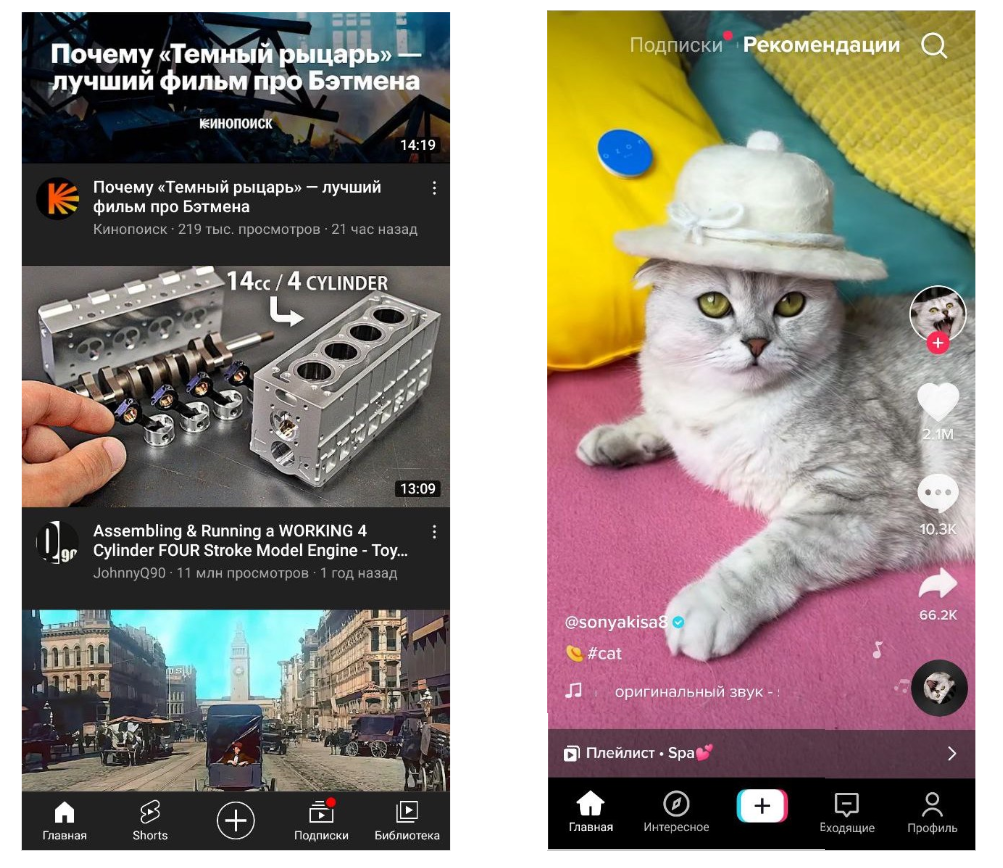

Раз мы заговорили о видео-хостингах, давайте сразу вспомним и об онлайн-кинотеатрах. На сайте любого онлайн-кинотеатра Вы можете увидеть несколько разных подборок с фильмами и сериалами, а одна из них будет персонализирована именно под Вас.


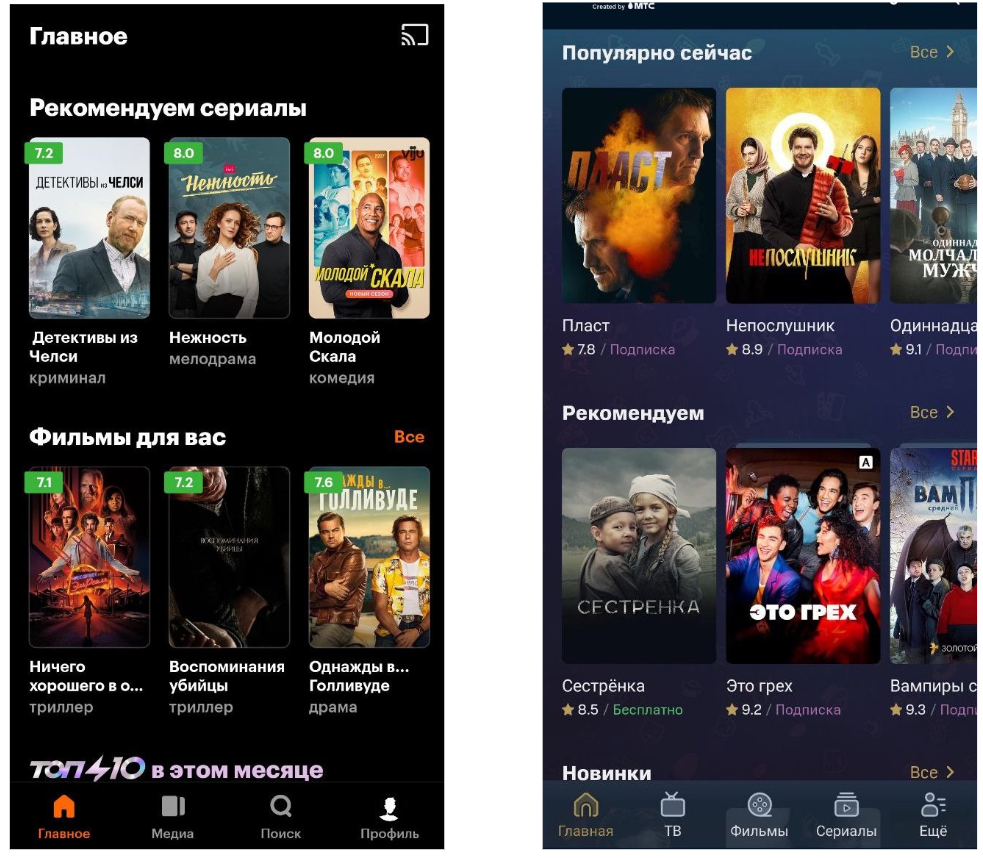

Вероятно, в свободное время или во время рабочих дел Вы любите послушать музыку. В музыкальных стриминговых сервисах также есть место для рекомендаций. Рекомендации в таких сервисах обычно представляют собой заранее сгенерированные плейлисты, либо могут иметь формат радио – когда очередная музыкальная композиция выбирается "на лету".


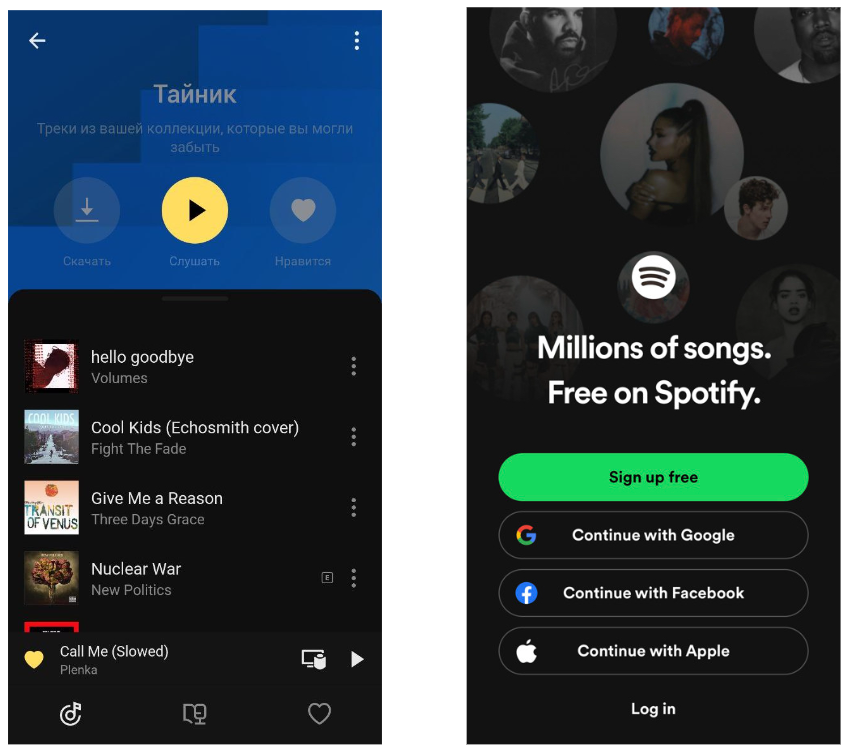

Рекомендации играют огромное значение в онлайн-магазинах. С помощью них не только Вы можете найти подходящий для себя товар, но и магазин заработать на большем числе продаж.

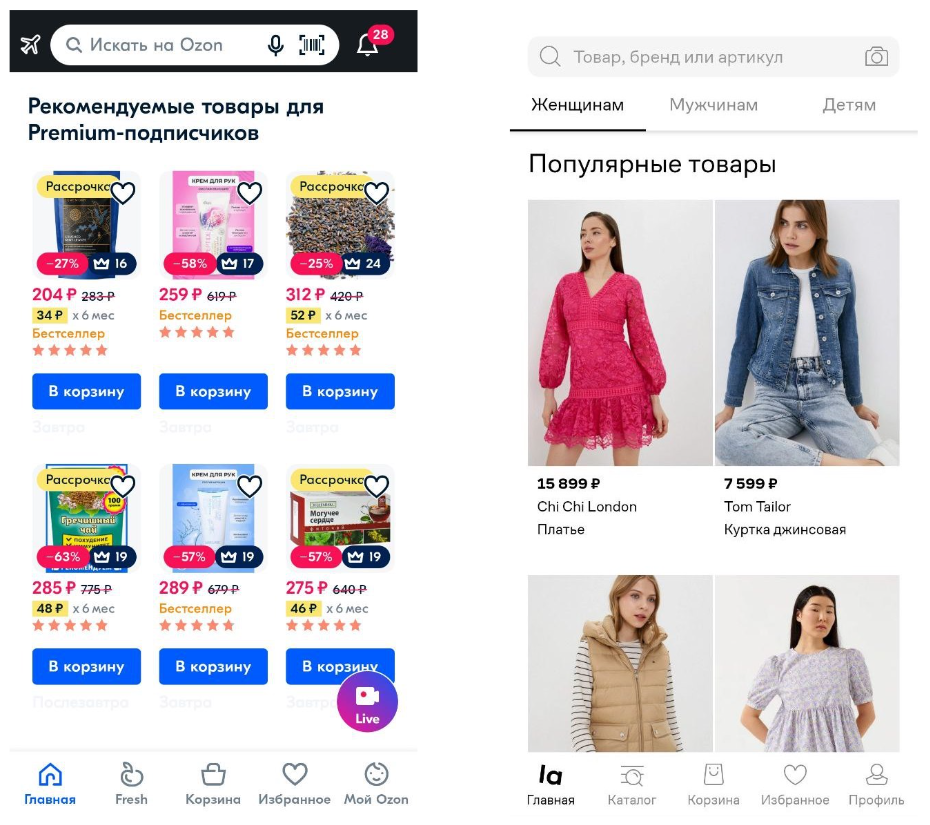

Как Вы уже поняли, рекомендовать можно многое:
* текстовые статьи;
* книги;
* посты, группы и друзей в социальных сетях;
* объявления о покупке/продаже товаров;
* кафе и рестораны;
* события и мероприятия;
* вакансии;
* и др.

Что общего во всех этих примерах, когда сервису нужны хорошие рекомендации?

1. У сервиса должно быть много разнообразного контента (товаров), чтобы было ЧТО рекомендовать.
2. У сервиса дожна быть большая аудитория, чтобы было КОМУ рекомендовать.

Основная задача рекомендательных систем – упростить поиск релевантных объектов и обогатить пользовательский опыт.

# С чего все начиналось?

В **2006 году** компания **Netflix** (на тот момент она еще не была онлайн-кинотеатром) решила поставить перед мировым сообществом грандиозную бизнесовую задачу – улучшить качество своих рекомендаций. На тот момент это было одним из первых [kaggle](https://www.kaggle.com/)-подобных соревнований по машинному обучению. В качестве вознаграждения команде специалистов, которая покажет наилучший результат, компания предложила призовой фонд в **1 миллион долларов**. Конкурс получил название в честь на тот момент огромного приза –  **Netflix Prize**. Само соревнование продлилось целых **3 года**.

Netflix выложила датасет, в котором было **480 тыс. пользователей, 17 тыс. фильмов и 100 миллионов оценок**. На тот момент это был достаточно большой объем данных, которые нельзя было так просто обработать на своем персональном компьютере.

Это соревнование дало огромный толчок развитию алоритмов и технологий, связанных с рекомендательными системами и обработкой больших данных.



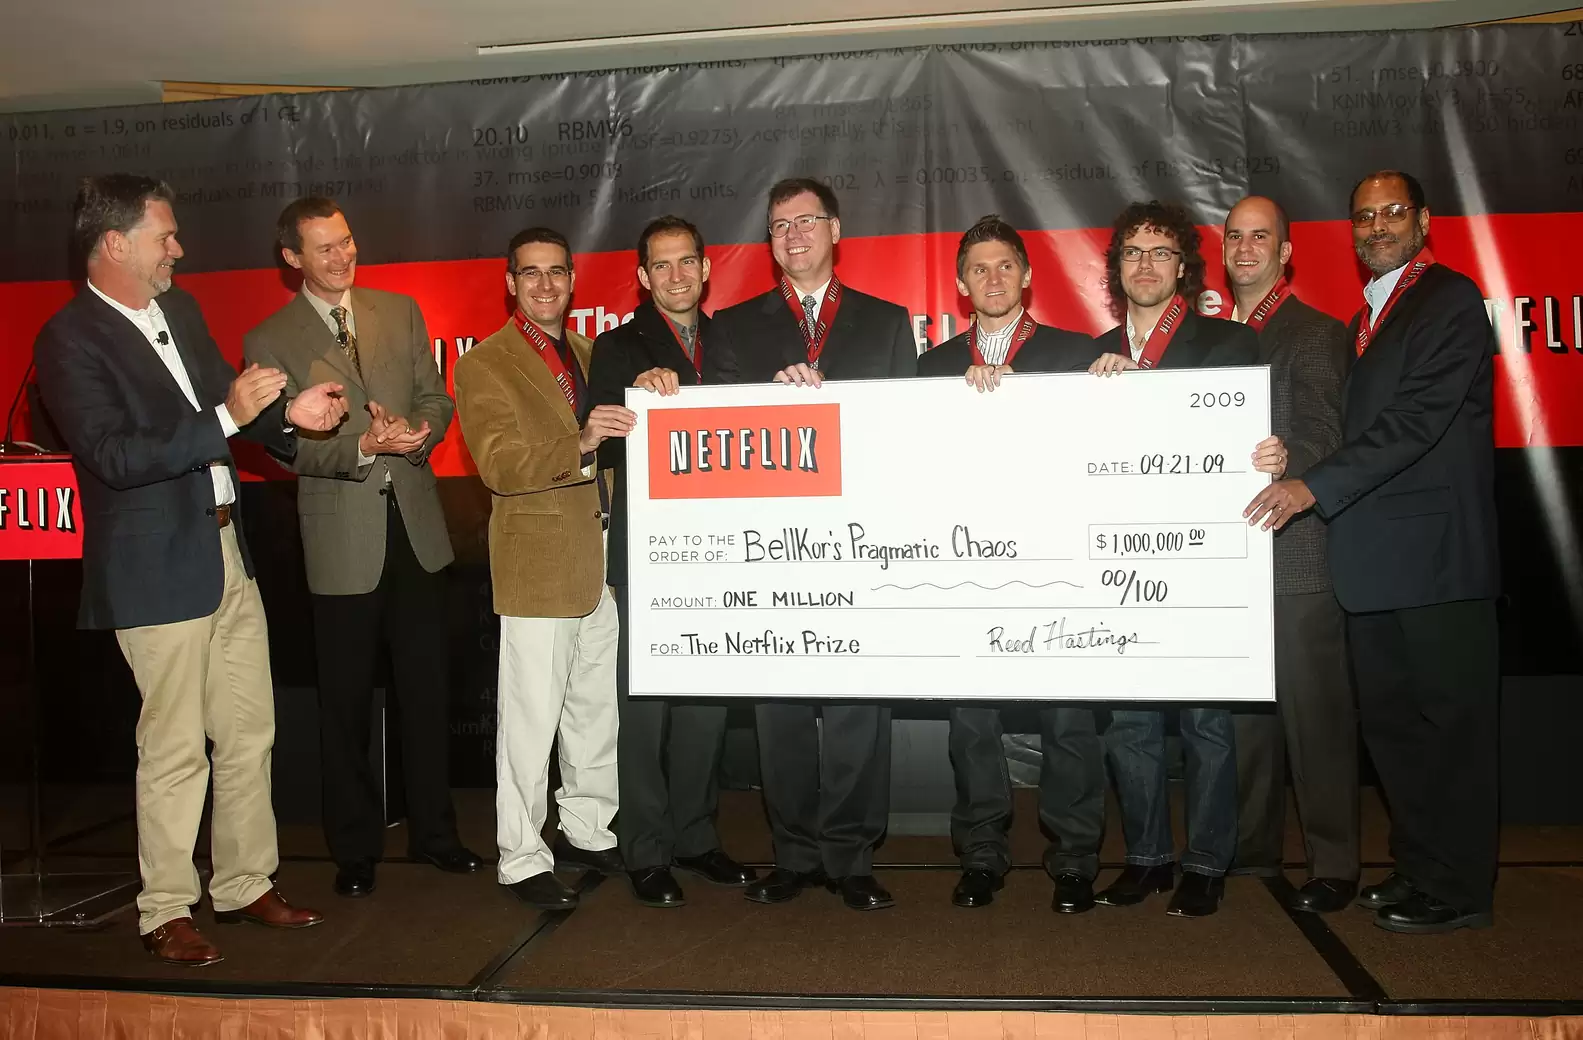


В конце конкурса разыгралась настоящая человеческая драма: команда победитель отправила свое решение на 20 минут раньше, чем команда, которая заняла второе место. Скор, который удалось выбить обоим командам, был абсолютно одинаковый с точностью до 4 знака после запятой (именно такая точность была задана  организаторами).
    
В ходе соревнования удалось улучшить **целевую метрику RMSE** на целых **10%**, но ни одно из решений победителей не удалось полностью внедрить в компании, потому что алгоритмы были очень тяжелыми и работали неприемлемо долго.

https://www.thrillist.com/entertainment/nation/the-netflix-prize

# Общая схема работы рекомендательных систем

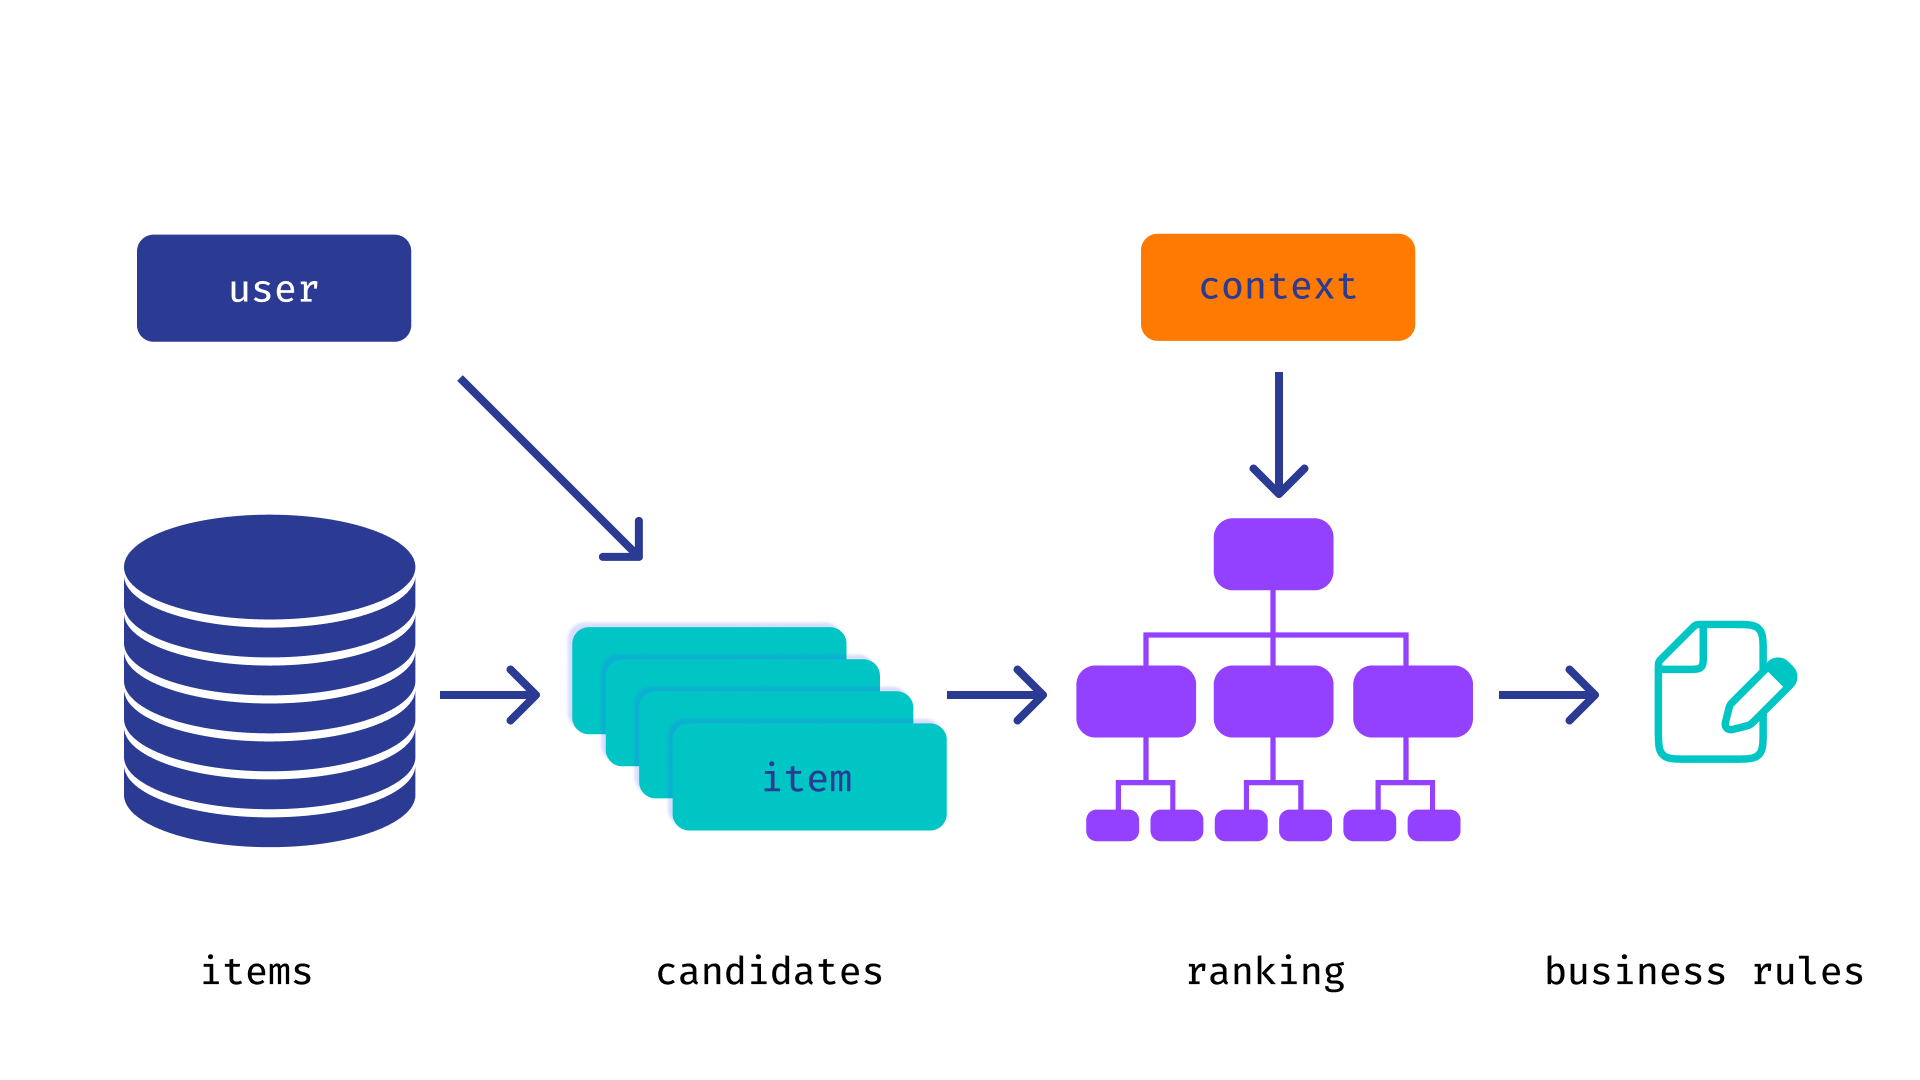



В общей схеме работы рекомендательных систем можно выделить следующие этапы:
1. `candidates` – этап отбора кандидатов из всей коллекции сущностей `items`;
2. `ranking` – этап ранжирования отобранных кандидатов;
3. `business rules` – этап применения бизнес-правил.

Все этапы работы данной системы имеют сильные временные ограничения (около ~200мс на запрос), что является очень сложной технической задачей. Некоторые из этапов не обязательно вычислять в онлайне, так этап отбора кандидатов (частично) можно выполнить в оффлайне.

В рамках данного занятия мы сосредоточимся на первом этапе (отборе кандидатов).

# Постановка задачи

Пусть есть:
* $U$ – множество пользователей – users;
* $I$ – множество сущностей (товаров, документов и т.п.) – items.
* $R = \{(u, v): r_{uv}\}$ – множество взаимодействий/рейтингов/оценок.

Множество взаимодействий можно представить в виде одной разреженной матрицы $R$, где
* строки ~ пользователи;
* столбцы ~ сущности;
* пересечение – рейтинги.

<center>
<img src="https://drive.google.com/uc?export=view&id=12n8Z6Adgb7wgud73uHThKhGz2qbd_wXt" width=720>
</center>

Тогда мы хотим уметь решать следующие задачи:
* предсказывать пропущенные элементы в матрице;
* уметь оценивать похожесть пользователей/сущностей друг на друга;
* уметь строить рекомендации для пользователей/сущностей.

Возникает естественный вопрос: как правильно выбирать значения в матрице $R$? Существует два типа сигнала (feedback):

1. Явный – explicit:
* лайк/дизлайк;
* оценка;
* покупка;
* отзыв.

2. Неявный – implicit:
* клик/показ;
* глубина просмотра;
* добавление в корзину;
* поведение (например, поисковые запросы).

В качестве значений $R$ можно использовать весовую сумму обоих типов сигналов.

# Типы рекомендательных систем

Выделяют 4 основных типа рекомендательных систем:

1. Основанные на экспертных знаниях (knowledge-based)
2. Основанные на контенте (content-based)
3. Основанные на поведении пользователей (collaborative filtering)
4. Гибридные (hybrid)

Knowledge-based рекомендации – это рекомендации, основанные на некоторой экспертной оценке. Например, если компания Apple выпускает новый смартфон, то почти любой ритейлер повесит на главной странице баннер с предложением преобрести новое устройство (или оформить предзаказ).

Content-based рекомендации используют непосредственные знания о структуре сущностей. Так, если мы делаем рекомендации для онлайн-магазина, то контентные рекомендации будут определять туфли к туфлям, смартфоны к смартфонам, а книги к книгам.

Коллаборативная фильтрация – группа алгоритмов, которые учитывают поведение пользователя в сервисе и его взаимодействие с рекомендательной системой. Такие алгоритмы считаются наиболее сильными и дающими наилучшее качество.

Гибридные рекомендации сочетают в себе плюсы контентных и поведенческих алгоритмов, их задача – научиться смешивать оба типа рекомендаций.

# Коллаборативная фильтрация

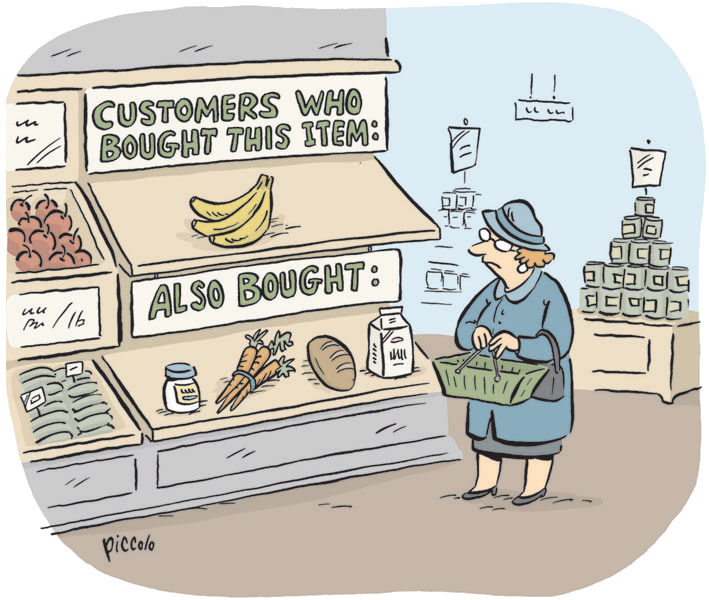


https://www.rinapiccolo.com/piccolo-cartoons

Алгоритмы коллаборативной фильтрации можно условно поделить на две группы:

1. Memory-based – алгоритмы, которые хранят всю матрицу взаимодействий $R$. Похожесть пользователей задается как похожесть строк матрицы, похожесть сущностей – похожесть столбцов матрицы.
2. Latent factor model-based – алгоритмы, которые выучивают векторные представления для пользователей и сущностей. С помощью этих представлений можно частично восстановить значения в матрице $R$. Похожесть между пользователями/сущностями задается как похожесть между соответствующими векторными представлениями.

Для иллюстрации работы алгоритмов коллаборативной фильтрации мы будем использовать урезанный датасет оценок пользователей для фильмов [MovieLens](https://grouplens.org/datasets/movielens/). Этот датасет является классическим бенчмарком для оценки качества рекомендательных систем в научной среде.

Загрузим этот датасет при помощи ряда стандартных команд ОС Linux:

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-1m.zip -O movilens-1m.zip
!rm -r ml-latest-small ml-1m || true
!unzip movilens-1m.zip

--2023-04-26 14:26:26--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘movilens-1m.zip’

movilens-1m.zip     100%[===================>]   5.64M  19.6MB/s    in 0.3s    

2023-04-26 14:26:27 (19.6 MB/s) - ‘movilens-1m.zip’ saved [5917549/5917549]

rm: cannot remove 'ml-latest-small': No such file or directory
rm: cannot remove 'ml-1m': No such file or directory
Archive:  movilens-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


Загрузим библиотеки для рекомендательных систем:

In [ ]:
!pip install surprise implicit --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195833 sha256=f70f8ac48d9c75a78ba9ac22b8aa506e3d59d4f4ba9f129d4991a6c5348a3762
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

*Замечание*: здесь мы впервые сталкиваемся с использованием библиотеки `tqdm`. Это библиотека, в которой реализован специальный инструмент для визуализации прогресса выполнения некоторого процесса в виде т.н. progress_bar.

Загрузим датасет и отсортируем его по пользователям и  времени:

In [ ]:
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=['userId', 'itemId', 'rating', 'ts'])
ratings.sort_values(by=['userId', 'ts'], inplace=True)
ratings.head()

userId  itemId  rating         ts
31       1    3186       4  978300019
22       1    1270       5  978300055
27       1    1721       4  978300055
37       1    1022       5  978300055
24       1    2340       3  978300103

Рассмотрим основные характеристики загруженного датасета:

In [ ]:
print('Число пользователей:', ratings['userId'].nunique())
print('Число фильмов:', ratings['itemId'].nunique())
print('Количество оценок:', len(ratings))

Число пользователей: 6040
Число фильмов: 3706
Количество оценок: 1000209


Посмотрим информацию о фильмах в датасете:

In [ ]:
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=['itemId', 'name', 'tags'], encoding="ISO-8859-1")
movies['tags'] = movies['tags'].str.split('|')
movies.head()

itemId                                name  \
0       1                    Toy Story (1995)   
1       2                      Jumanji (1995)   
2       3             Grumpier Old Men (1995)   
3       4            Waiting to Exhale (1995)   
4       5  Father of the Bride Part II (1995)   

                               tags  
0   [Animation, Children's, Comedy]  
1  [Adventure, Children's, Fantasy]  
2                 [Comedy, Romance]  
3                   [Comedy, Drama]  
4                          [Comedy]

In [ ]:
mapping_movies_name = dict(zip(movies['itemId'], movies['name']))

## item2item рекомендации

Попробуем решить следующую задачу. Мы хотим научиться рекомендовать для каждого фильма список похожих на него фильмов (на основании поведения пользователей). Возьмем все фильмы, которые понравились пользователям. Будем полагать, что фильмы, которые смотрят вместе одни люди, скорее будут похожими.

В качестве рекомендации пользователю после позитивной оценки некоторого фильма мы выведем целый список похожих фильмов, отранжированных по их похожести.

То есть, например, Вы посмотрели фильм "Звёздные войны: Эпизод V", и он Вам очень понравился, Вы поставили ему высокую оценку. Item2Item подход предлагает сразу же посмотреть, какие фильмы, как мы знаем, похожи на фильм "Звёздные войны: Эпизод V" с точки зрения предпочтений уже известных нам пользователей. В простейшем случае мы бы могли посмотреть, какие фильмы часто смотрят вместе со "Звёздными войнами", и просто предложить их, но мы воспользуемся более интересной идеей.

Для этого хорошо бы научиться измерять похожесть фильмов, соответственно рекомендациям, этими фильмами полученным. Для этого воспользуемся метрикой, которая называется PMI.

## PMI

Пусть некоторый объект описывается множеством бинарных (в общем случае - категориальных) признаков. Для оценки связи между категориальными признаками часто используется мера PMI (pointwise mutual information). Пусть есть 2 бинарных (или опять же - категориальных) признака: $x$ и $y$.


Введём обозначения:

* $p(x, y)$ – вероятность встретить признаки $x$ и $y$ у одного объекта;
* $p(x)$ – вероятность встретить признак $x$ у объекта;
* $p(y)$ – вероятность встретить признак $y$ у объекта.

Рассмотрим случай, при котором $x$ и $y$ встречаются у объекта независимо друг от друга. Тогда:
$$p(x, y) = p(x)⋅p(y)$$
То есть
$$\frac{p(x, y)}{p(x)⋅p(y)} = 1$$

Если же $x$ и $y$ не независимы, то
$$p(x, y) = p(x)⋅p(y|x) = p(y)⋅p(x|y)$$

То есть величина $$\frac{p(y|x)}{p(y)} = \frac{p(x|y)}{p(x)} = \frac{p(x, y)}{p(x)p(y)}$$ демонстрирует нам степень связи между компонентами $x$ и $y$. Например, если эта величина больше 1, мы можем смело утверждать, что признаки $x$ и $y$ часто встречаются вместе, поскольку вероятность встретить признак $x$ пр условии наличия признака $y$ превышает вероятность встретить у произвольного объекта признак $y$ вообще. И наоборот, если эта величина меньше 1, то вероятность встретить признак $x$ у объекта с признаком $y$ ниже, чем в среднем.

Не очень удобно работать с величиной, нейтральное значение которой равно 1, а качественный результат получается при сравнении именно с 1. Намного удобнее было бы перенести нейтральное значение в 0, а также выравнять шкалу. Это можно сделать при помощи логарифмирования полученного выражения. Таким образом мы приходим к метрике PMI:



$$ PMI(x, y) = \log_2 \frac{p(y|x)}{p(y)} = \log_2 \frac{p(x,y)}{p(x)p(y)} = \log_2 \frac{p(x|y)}{p(x)}, $$





Воспользуемся частым приемом математической статистики: в дискретном случае можно заменить вероятности на частотные оценки:

$$ p(x,y) = \frac{n_{xy}} {N}, ~~ p(x) = \frac{n_{x}} {N}, ~~ p(y) = \frac{n_{y}} {N}, $$

тогда

$$ PMI(x,y) = \log_2 \frac{n_{x,y}  N}{n_x n_y}, $$

где
* $n_x$ – число объектов, которые имели признак $x$;
* $n_y$ – число объектов, которые имели признак $y$;
* $n_{x,y}$ – число объектов, которые имели оба признака $x$ и $y$;
* $N$ – общее число объектов.

На практике ради простоты вычислений можно сделать шаг назад:
величина $PMI(x,y)$ используется для сравнения (ранжирования) признаков $x$ и $y$, поэтому для проcтоты можно отказаться от логарифма и константы $N$ и перейти к величине

$$ score(x, y) = \frac{n_{x,y}}{n_x n_y} $$

В нашем случае в качестве объекта будет выступать пользователь, а категорийным признаком – факт, что пользователь положительно оценил фильм.

____________________________________________________
## Пример
Для лучшего понимания предложенной идеи оценки близости пользователей и объектов приведу такой пример:

Пусть есть три пользователя некоторого онлайн-кинотеатра: Паша, Света и Миша.

Каждый из них лайкает ровно половину просмотренных фильмов (Так уж случилось, они любят кино). Пусть, например, таблица с их лайками всех эпизодов "Звездных Войн" выглядит так:


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Эпизод I': [0, 1, 0], 'Эпизод II': [0, 1, 0], 'Эпизод III': [1, 0, 1], 'Эпизод IV': [1, 0, 1], 'Эпизод V': [0, 1, 0], 'Эпизод VI': [1, 0, 1]},
                  index = ['Паша', 'Света', 'Миша']).T

df

Паша  Света  Миша
Эпизод I       0      1     0
Эпизод II      0      1     0
Эпизод III     1      0     1
Эпизод IV      1      0     1
Эпизод V       0      1     0
Эпизод VI      1      0     1

Как мы видим, Паша и Миша всегда лайкали одни и те же эпизоды "Звёздных Войн", а вот мнение Светы радикально отличалось от мнения друзей - она лайкала все остальные эпизоды.

Что мы можем сказать в этом случае о похожести вкусов пользователей?
Конечно, нам бы хотелось, чтобы наша метрика обнаружила максимальное сходство пашиных вкусов с мишиными и отличие от вкусов Светы.

Посчитаем для начала вероятность того, что Паша лайкнет некоторый случайный фильм.

In [ ]:
P_pasha = df['Паша'].sum()/df.shape[0]
P_pasha

0.5

А теперь узнаем, какова **вероятность того, что Паша лайкнет некоторый фильм, при условии  того что его уже лайкнула Света**.

In [ ]:
films_liked_by_sveta = df[df['Света'] == 1]
n_sveta_liked = films_liked_by_sveta.shape[0]
P_pasha_cond_sveta = films_liked_by_sveta['Паша'].sum()/n_sveta_liked
P_pasha_cond_sveta

0.0

Совершенно не удивительно, ведь они не лайкнули совместно ни одного фильма.
А что будет, если мы посчитаем такую же величину для Миши?

In [ ]:
films_liked_by_misha = df[df['Миша'] == 1]
n_misha_liked = films_liked_by_misha.shape[0]
P_pasha_cond_misha = films_liked_by_misha['Паша'].sum()/n_misha_liked
P_pasha_cond_misha

1.0

Тоже вполне очевидный результат. Посчитаем теперь отношение вероятностей.

In [ ]:
# Паша и Света
P_pasha_cond_sveta/P_pasha

0.0

In [ ]:
# Паша и Миша
P_pasha_cond_misha/P_pasha

2.0

Логарифмируя эту величину, мы и получим **PMI**

In [ ]:
# PMI Паши и Светы
np.log2(P_pasha_cond_sveta/P_pasha + 1e-5)

-16.609640474436812

In [ ]:
# PMI Паши и Миши
np.log2(P_pasha_cond_misha/P_pasha)

1.0

PMI измеряет совместимость людей намного лучше, чем гороскоп.

______________________________________
Отберем только позитивные оценки и посчитаем отметки для каждого фильма: $n_x$ и $n_y$

In [ ]:
ratings_pos = ratings[ratings['rating'] > 3]
counts = ratings_pos.groupby('itemId')['userId'].count().rename('cnt')
counts

itemId
1       1655
2        285
3        148
4         37
5         96
        ... 
3948     530
3949     240
3950      33
3951      27
3952     264
Name: cnt, Length: 3533, dtype: int64

Посчитаем позитивные оценки пользователей

In [ ]:
user_likes = ratings_pos.groupby('userId')['itemId'].agg(list)
user_likes

userId
1       [3186, 1270, 1721, 1022, 1836, 3408, 2804, 120...
2       [1198, 1210, 1293, 2943, 1225, 1193, 318, 3030...
3       [2858, 1968, 1961, 1266, 1378, 1379, 3671, 590...
4       [1097, 3468, 480, 260, 1198, 1387, 2028, 2366,...
5       [908, 919, 1250, 2858, 2997, 2770, 2355, 2908,...
                              ...                        
6036    [1721, 1883, 2858, 2997, 2710, 223, 3203, 1093...
6037    [1267, 2028, 3148, 858, 562, 912, 1221, 923, 2...
6038    [1210, 2146, 356, 1079, 1148, 3548, 3088, 232,...
6039    [282, 111, 2067, 930, 3022, 3088, 2804, 955, 1...
6040    [858, 593, 2384, 1961, 2019, 573, 213, 3111, 3...
Name: itemId, Length: 6038, dtype: object

Необходимые импорты
________________________________

In [ ]:
from itertools import combinations
from collections import Counter

counts_pair = Counter()

________________________

Посчитаем величины $n_{xy}$, а также уберём те фильмы, которые встречались друг с другом менее 100 раз. Так как датасет у нас достаточно объемный, эта мера поможет не рассматривать огромное количества неинформативных пар.

In [ ]:
%%time

# считаем попарную встречаемость каждого фильма с каждым в рамках пользователя – n_{xy}
for items in tqdm(user_likes):
    for pair in combinations(items, 2):
        counts_pair[pair] += 1
        counts_pair[pair[::-1]] += 1

counts_pair = pd.DataFrame(
    [(*pair, cnt) for pair, cnt in counts_pair.items()],
    columns=['itemId_x', 'itemId_y', 'pair_cnt'],
)

# уберем те фильмы, которые встречали друг с другом менее 100 раз (считаем, что это шум)
counts_pair = counts_pair[counts_pair['pair_cnt'] > 100]
counts_pair.sort_values(by=['itemId_x', 'pair_cnt'], ascending=[True, False], inplace=True)

counts_pair.head()

  0%|          | 0/6038 [00:00<?, ?it/s]

CPU times: user 1min 57s, sys: 1.94 s, total: 1min 59s
Wall time: 2min 6s


itemId_x  itemId_y  pair_cnt
62532         1      1196      1000
777           1       260       998
22489         1      2858       949
19859         1      2571       925
40815         1      1198       922

Теперь объединим все счетчики вместе. Так как мы строим рекомендации для `itemId_x`, в PMI для всех кандидатов величина `n(itemId_x)` будет одинаковой, поэтому на нее можно не делить. Не забываем отсортировать рекомендации по убыванию величины `score`.

In [ ]:
counts_merged = pd.merge(counts_pair, counts, left_on='itemId_y', right_index=True)
counts_merged['score'] = counts_merged['pair_cnt'] / counts_merged['cnt']
counts_merged.sort_values(by=['itemId_x', 'score'], ascending=[True, False], inplace=True)
counts_merged.head()

itemId_x  itemId_y  pair_cnt  cnt     score
1942          1       783       129  162  0.796296
1944          1      1566       163  205  0.795122
1940          1      2294       252  330  0.763636
62596         1      1023       125  166  0.753012
1946          1      1907       242  323  0.749226

Рассмотрим топ-30 рекомендаций для каждого фильма.

In [ ]:
recos = counts_merged.groupby('itemId_x')['itemId_y'].agg(lambda x: list(x)[:30])
recos

itemId_x
1       [783, 1566, 2294, 1023, 1907, 1025, 3034, 2083...
2       [2161, 1917, 316, 367, 2006, 364, 1073, 2640, ...
6       [2231, 2278, 431, 163, 555, 1589, 1047, 288, 1...
7       [2671, 539, 597, 11, 587, 1393, 1784, 1307, 35...
10      [1722, 1479, 2989, 3082, 2993, 1918, 2991, 434...
                              ...                        
3916    [3510, 3948, 3555, 3897, 3753, 3408, 2268, 139...
3927    [924, 750, 1200, 541, 1580, 480, 1214, 1097, 1...
3948    [3893, 3916, 3911, 3897, 3317, 3510, 3624, 386...
3949    [3317, 3911, 3897, 3160, 1673, 3481, 2692, 120...
3952    [3911, 3897, 3408, 3481, 1704, 2599, 50, 1213,...
Name: itemId_y, Length: 1095, dtype: object

In [ ]:
def top_recomendations(item_x):
  print('Рекомендации для ', mapping_movies_name[item_x], ':', sep='')
  print('=' * 60)

  for i, item_y in enumerate(recos.loc[item_x], 1):
      print('{:02d}\t{}'.format(i, mapping_movies_name[item_y]))

In [ ]:
top_recomendations(1)

Рекомендации для Toy Story (1995):
01	Hunchback of Notre Dame, The (1996)
02	Hercules (1997)
03	Antz (1998)
04	Winnie the Pooh and the Blustery Day (1968)
05	Mulan (1998)
06	Sword in the Stone, The (1963)
07	Robin Hood (1973)
08	Muppet Christmas Carol, The (1992)
09	Tarzan (1999)
10	Great Muppet Caper, The (1981)
11	Muppets Take Manhattan, The (1984)
12	Pinocchio (1940)
13	Home Alone (1990)
14	American Tail, An (1986)
15	Dumbo (1941)
16	Cool Runnings (1993)
17	Charlotte's Web (1973)
18	In & Out (1997)
19	Anastasia (1997)
20	That Thing You Do! (1996)
21	Muppet Movie, The (1979)
22	Sleeping Beauty (1959)
23	Beavis and Butt-head Do America (1996)
24	Cinderella (1950)
25	Blast from the Past (1999)
26	Aladdin (1992)
27	Beauty and the Beast (1991)
28	Lion King, The (1994)
29	Jungle Book, The (1967)
30	Toy Story 2 (1999)


## User-Based и Item-Based модели

### Тривиальная рекомендательная система

Она работает по принципу "Посоветуй пользователю $u$ те же товары, которые другие пользователи приобретали вместе с товарами, купленными пользователем $u$". Или же знаменитая формула: **"Клиенты, купившие что-то также покупали нечто еще"**

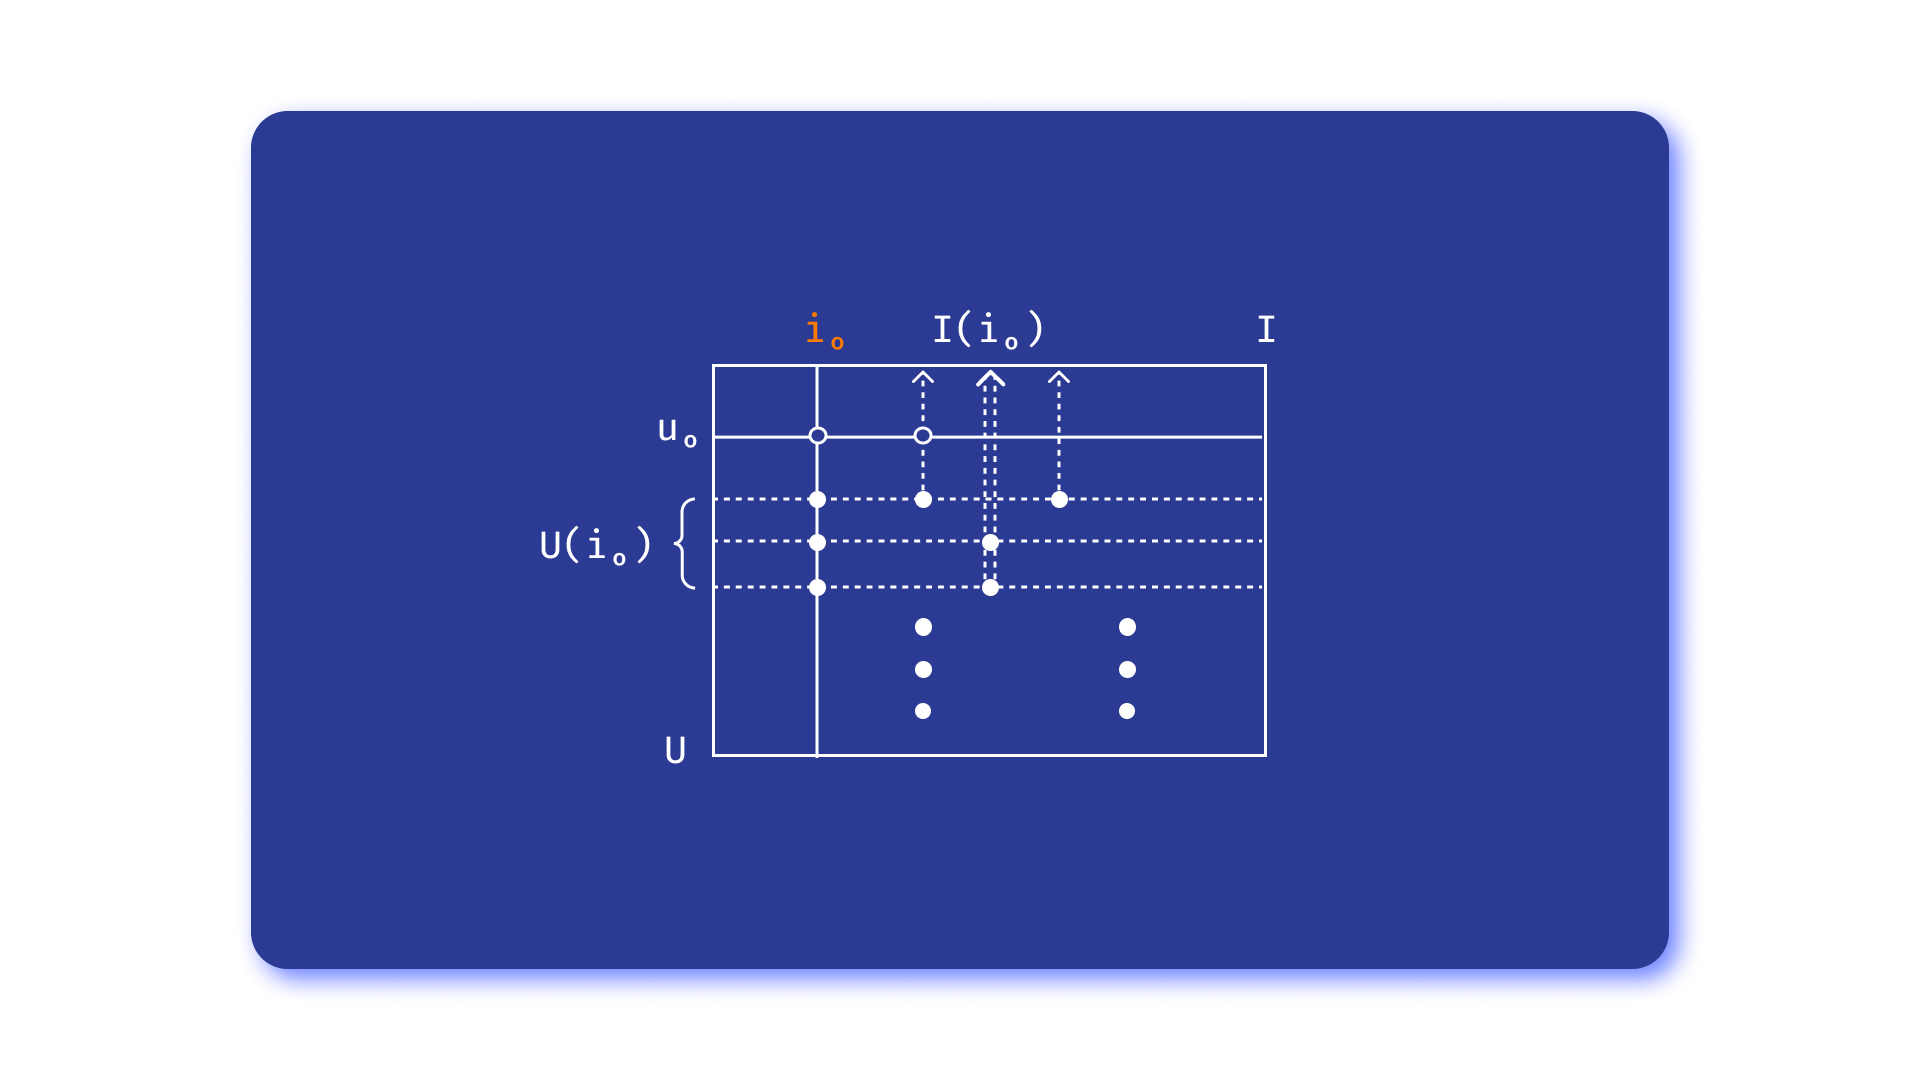

Алгоритм:

1. Отбираем пользователей, про которых нам точно известно, что они ставили позитивную оценку (покупали/высоко оценили/переходили на соответствующую страницу веб-сайта) данному объекту $i_0$

Этих пользователей можно охарактеризовать следующей формулой, если под заполненной ячейкой матрицы $R$ ($r_{ui} \neq ∅$) мы понимаем фразу "пользователь $u$ высоко оценил товар $i$":
$$U(i_0) = \{u \in U | r_{ui_0} \neq ∅\}$$

2. Отбираем товары, похожие на товар $i_0$ в достаточной степени. Для этого мы пользуемся какой-нибудь мерой сходства товаров ($sym$), например - **PMI**:

$$I(i_0) = \{i \in I | sim(i, i_0) > α \}$$

В данном лучае мы ищем такие объекты, схожесть которых с $i_0$ не меньше, чем некоторый $α$, значение которого мы контролируем сами.

3. Выбираем N самых лучших товаров из найденного списка

### User Based

Поставим теперь задачу построить рекомендации для некоторого пользователя $u_0$.

User-based и item-based модели очень похожи между собой, поэтому рассмотрим, например, user-based подход.

Идею user-based моделей коллаборативной фильтрации можно выразить при помощи концепции рекомендации: **"клиенты, похожие на $u$ также покупали $I(u)$"**

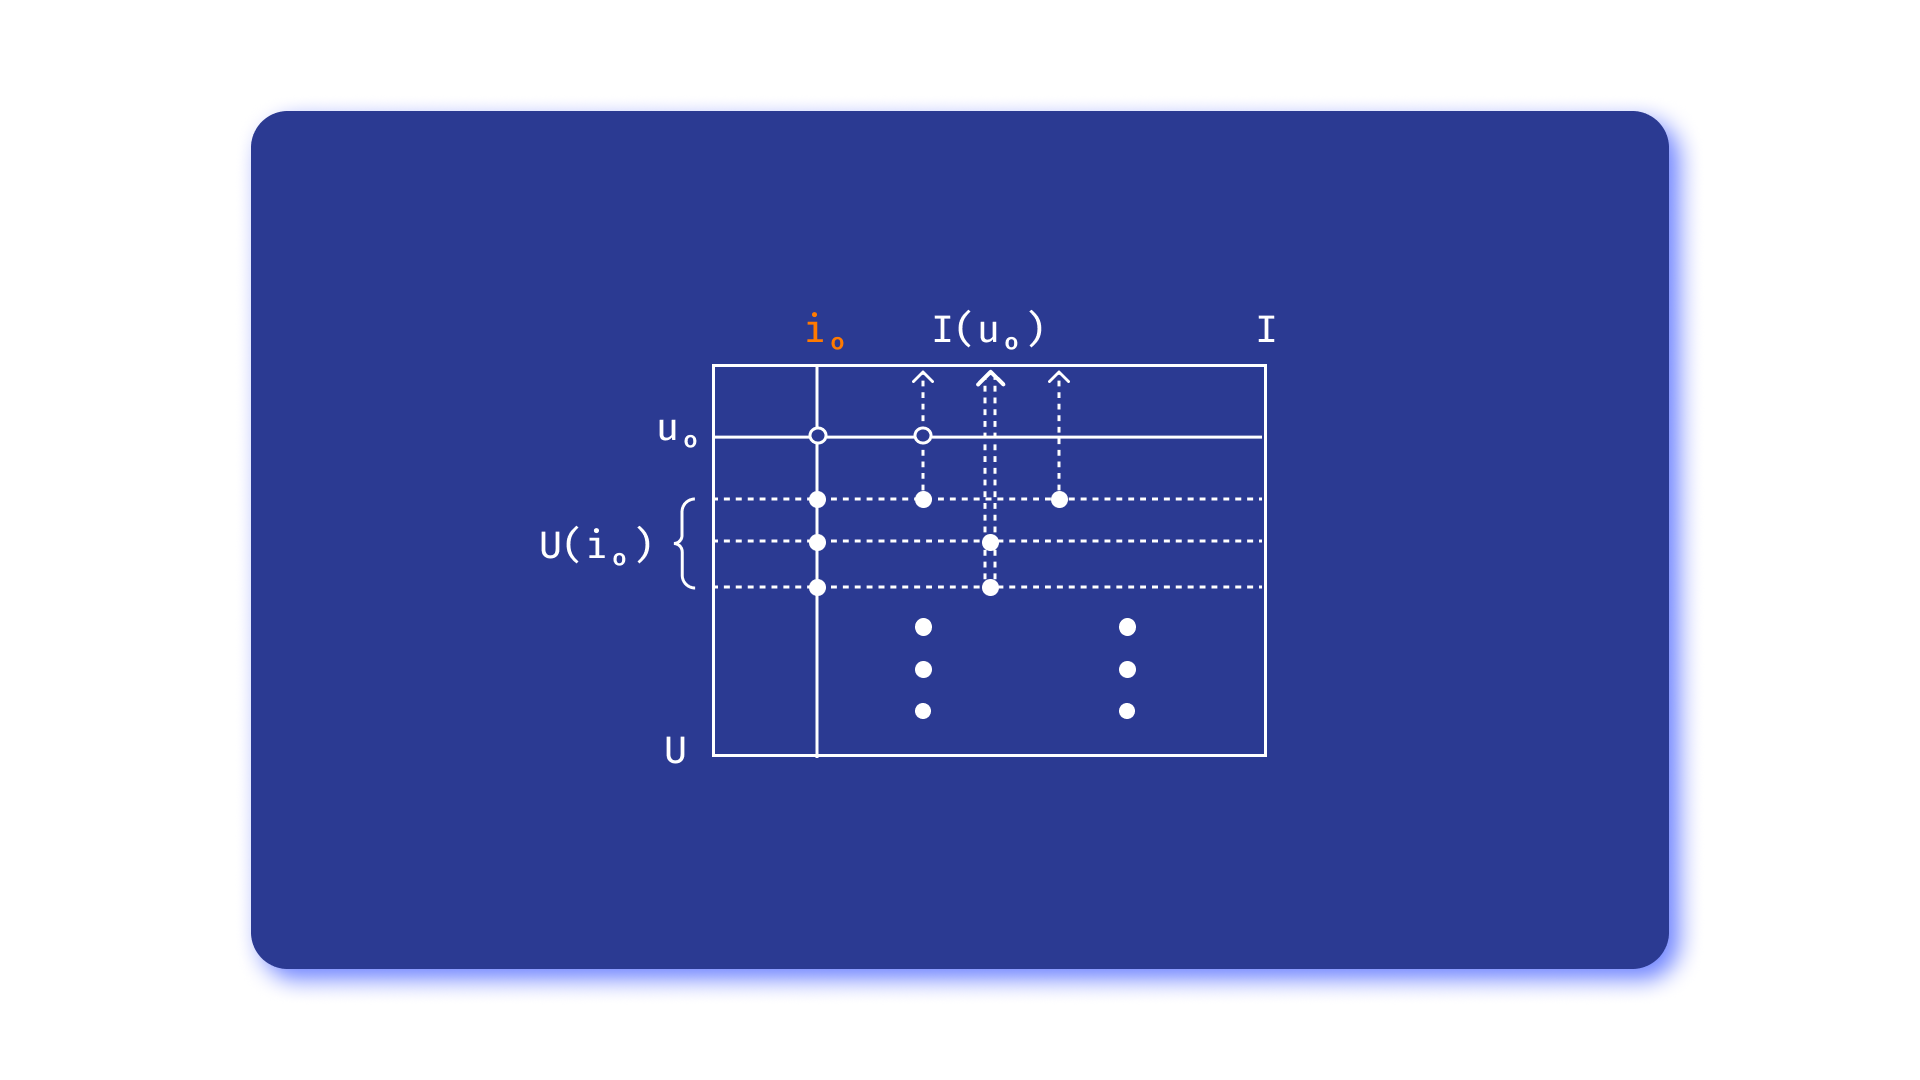



Алгоритм следующий:

1. Для пользователя $u_0$ отбираем топ-похожих на него соседей относительно некоторой метрики похожести. Размер топа можно задать фиксированным, либо сделать ограничение на минимальное значение похожести $\alpha$:

$$ U(u_0) = \{ u \in U | sim(u, u_0) > \alpha \} $$

Множество $U(u_0)$ еще называется коллаборацией.

2. Для каждой сущности (фильма) $i$, оцененной хотя бы одним пользователем $u$ из коллаборации $U(u_0)$, расчитываем характеристику $r_{u_0i}$:

$$ r_{u_0i} = \frac{\sum\limits_{(u, i) \in R}{sim(u, u_0) \cdot r_{ui}}}{\sum\limits_{(u, i) \in R}{sim(u, u_0)}} $$

$r_{u_0i}$ имеет смысл среднего взвешенного всех оценок, поставленных сущности $i$ пользователями из коллаборации $U(u_0)$, где в качестве весов выступает похожесть пользователя $u$ из коллаборации $U(u_0)$ на пользователя $u_0$.

То есть мы утверждаем, что предсказать оценку пользователя $u_0$ фильма $i$ можно, посмотрев на оценки этого фильма *пользователей, похожих по своим вкусам на самого пользователя $u_0$*, при этом с учетом этой похожести.

Например, пусть на пользователя *Лешу* похожи пользователи *Дима*, *Егор* и *Маша*. При этом нам известно, что Диме не понравился "Титаник", он поставил ему оценку 2, а Егору и Маше "Титаник" очень понравился, они оценили его на 4 и 5 соответственно. Но вкусы Димы не очень похожи на вкусы Лёши, мера их схожести равна **1**, Маша похожа на Лёшу немного больше, мера их схожести равна **2**, а вот Егор - лучший друг Лёши, мера их сходства равна **7**.

В этом случае очевидно, что для предсказания того, насколько "Титаник" понравится Лёше, ориентироваться стоит в большей степени на оценку Егора, но и про оценки Димы с Машей забывать не стоит. Считаем, какой процент от общей схожести приходится на Егора: $$\frac{7}{7 + 1 + 2} = 0.7$$
Аналогично для Маши и Димы:
$$\frac{2}{7 + 1 + 2} = 0.2$$
$$\frac{1}{7 + 1 + 2} = 0.1$$

Именно с этими весами мы и учтём мнения Димы, Егора и Маши:

$$r_{Lesha, Titanic} = 0.7⋅4 + 0.2⋅5 + 0.1⋅2 = 2.8 + 1 + 0.2 = 4$$

То есть мы предсказали, что Лёша оценит "Титаник" на 4, ровно как его лучший друг Егор.

3. Отбираем топ кандидатов по скору $r_{u_0i}$.

### Item-based

Идея item-based подхода следующая: **"вместе с объектами, которые покупал $u$ часто покупают $I(u)$"**

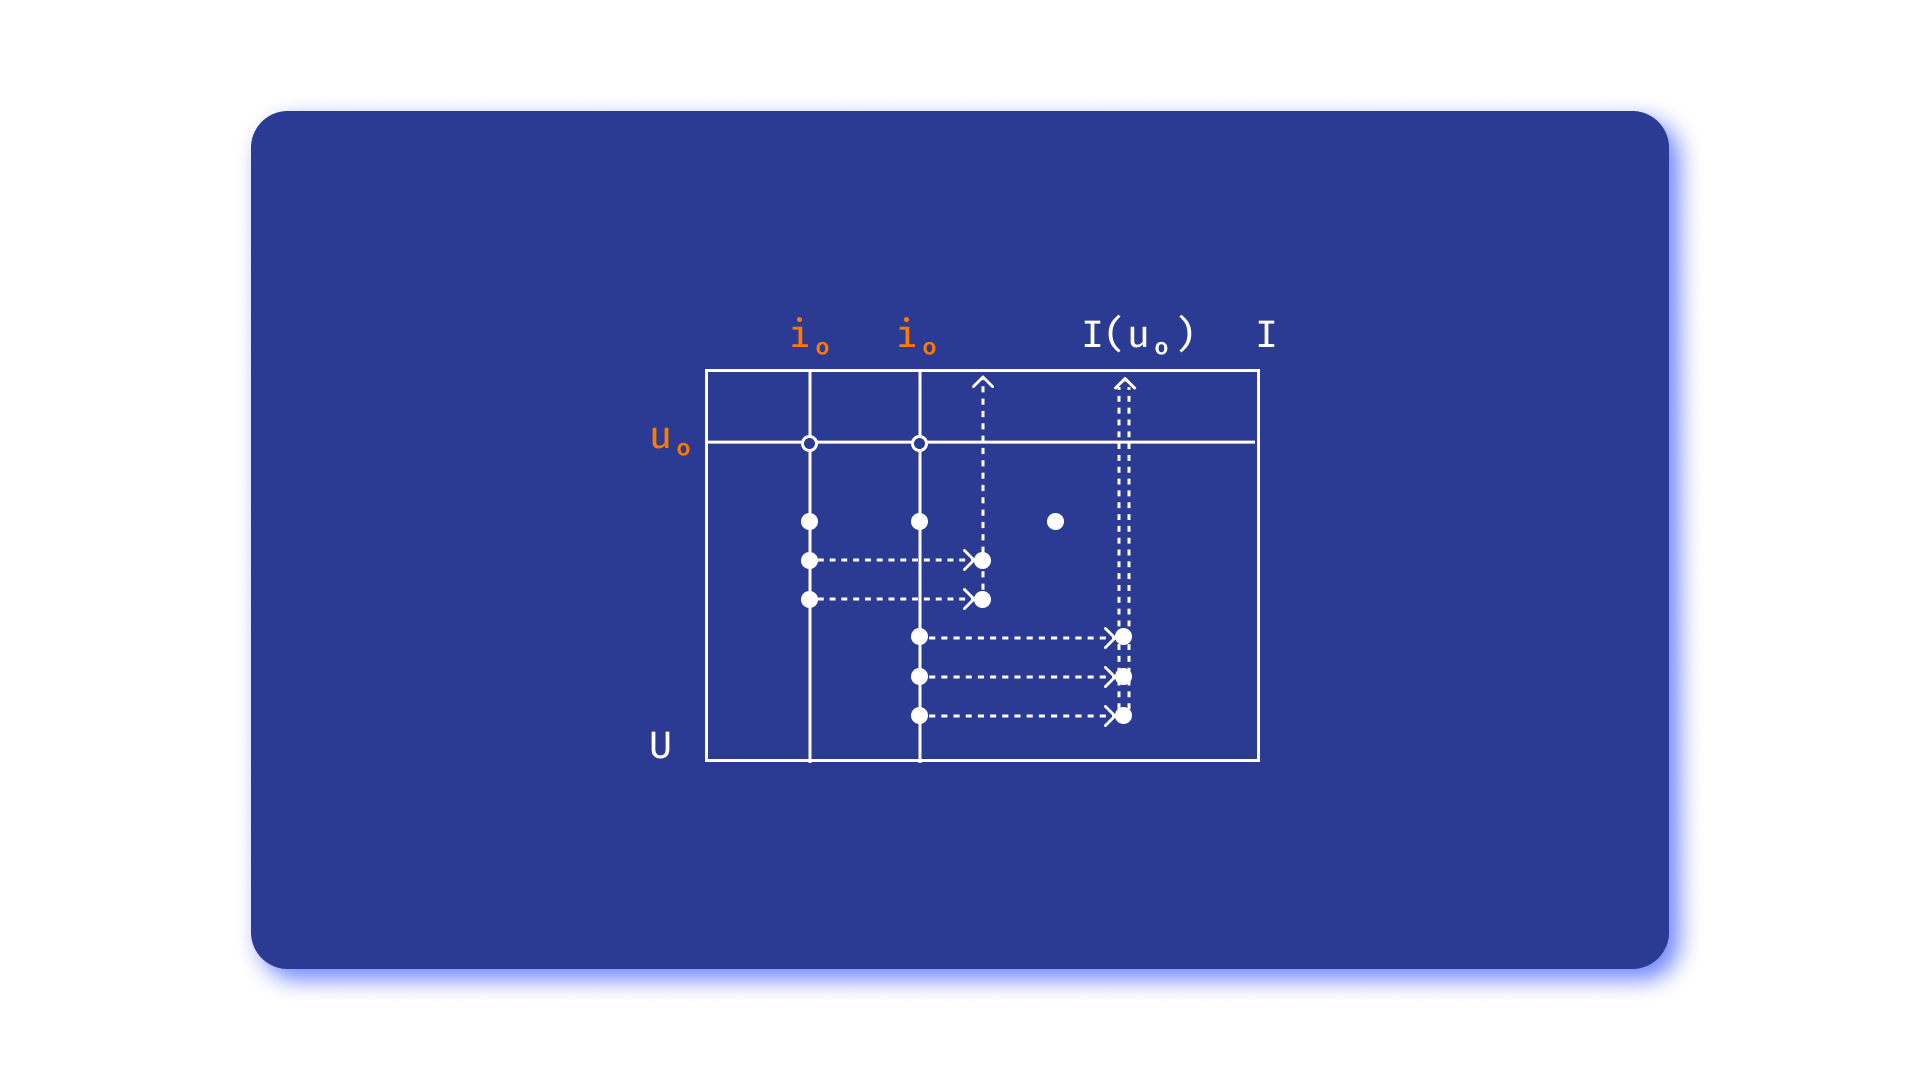

В случае item-based подхода алгоритм очень похож:

1\. Для пользователя $u_0$ отбираются сущности, похожие на те, с которыми пользователь взаимодействовал.

$$ I(u_0) = \{ i \in I | (i_0, u_0) \in R; sim(i, i_0) > \beta \} $$

В данном случае мы рассматриваем снова схожесть объектов, а не пользователей. Параметр $β$ определяет, насколько близкие объекты мы рассматриваем.

2\. Для каждой сущности (фильма) $i$ рассчитывается величина, аналогичная тому, что мы делали в пункте 2 User Based, только теперь - опять же - для объектов, а не пользователей:

$$ r_{u_0i} = \frac{\sum\limits_{(u_0, i_0) \in R} sim(i, i_0) \cdot r_{u_0i_0}}{\sum\limits_{(u_0, i_0) \in R} sim(i, i_0)} $$

3\. Отбираем топ кандидатов по скору $r_{u_0i}$.

### Недостатки таких моделей
1) Все приведённые модели являются memory-based моделями, так для поиска коллаборации им требуется хранить всю матрицу рейтингов $R$

2) Для user-based и item-based моделей актуальна проблема холодного старта: мы не знаем, что рекомендовать новым (а также нетипичным) пользователям или же как работать с новыми объектами





### Пример

In [ ]:
# отложим последние 10 оценок фильмов на валидацию

ratings_train = ratings.groupby('userId').apply(lambda x: x.iloc[:-10]).reset_index(drop=True)
ratings_valid = ratings.groupby('userId').apply(lambda x: x.iloc[-10:]).reset_index(drop=True)

In [ ]:
# В этой ячейке мы подгружаем данные при помощи функций модуля surprice
# Surprice - это модуль для работы с рекомендательными системами
# https://surpriselib.com/
from surprise import Dataset, Reader

ratings_surprise_train = Dataset.load_from_df(
    ratings_train[['userId', 'itemId', 'rating']],
    Reader(rating_scale=(1, 5), ),
).build_full_trainset()

ratings_surprise_valid = Dataset.load_from_df(
    ratings_valid[['userId', 'itemId', 'rating']],
    Reader(rating_scale=(1, 5), ),
).build_full_trainset()

Из модуля `Surprice` мы выберем алгоритм [KNNBasic](https://surprise.readthedocs.io/en/stable/knn_inspired.html), который реализует одну из двух концепций заполнения матрицы $R$: User-based или Item-based. На выбор концепции влияет поле `'user_based'`
Мы рассмотрим его модификацию, предсказывающую отклонение оценки пользователя от его `типичной` оценки.

Эта мысль достаточно логична: представьте, что среди пользователей Вашей рекомендательной системы есть кинокритик Анатолий и простодушный добряк Вадим. Кинокритик Анатолий достаточно строг ко всем фильмам, редко поставит высокую оценку даже довольно неплохим картинам, а вот Вадим раздаёт хорошие оценки почти всем фильмам, которые смотрит. В этом случае невозможно придумать рекомендательную систему, которая будет делать хорошие предсказания и для Анатолия и для Вадима одновременно, ничего не зная о таких особенностях их поведения. Но она может предсказать *насколько любому пользователю некоторый фильм понравится больше или меньше, чем какой-то средний фильм*. Такой подход будет применим одновременно и для Анатолия и для Вадима.

Класс [KNNBaseline](https://surprise.readthedocs.io/en/stable/knn_inspired.html) как раз-таки руководствуется этой идеей.

In [ ]:
%%time
# используем KNNBaseline вместо KNNBasic, потому что первый дает результат сильно лучше
from surprise import KNNBasic, KNNBaseline

model = KNNBaseline(k=10, sim_options={
    'user_based': True,
    'name': 'pearson_baseline',
})

model = model.fit(ratings_surprise_train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
CPU times: user 1min 7s, sys: 732 ms, total: 1min 8s
Wall time: 1min 9s


In [ ]:
%%time
from surprise import accuracy
_ = accuracy.rmse(model.test(ratings_surprise_valid.build_testset()))

RMSE: 0.9384
CPU times: user 44.1 s, sys: 132 ms, total: 44.3 s
Wall time: 44.4 s


## Latent factor model-based

Модели, использующие специальные векторные представления для пользователей и сущностей, широко распространены в современных моделях машинного обучения. Их неоспоримым преимуществом являются следующие два факта:
- нам больше не требуется хранить всю матрицу взаимодействий пользователей и сущностей $R$ – вместо них мы храним векторные представления для пользователей $p_u$ и сущностей $q_i$;
$$ p_u \in \mathbb{R}^m; m \ll |I| $$
$$ q_i \in \mathbb{R}^n; n \ll |U| $$
где $|I|$ – общее количество объектов, $|U|$ – общее количество пользователей.

Заметьте, в исходной матрице мы воспринимали **вектор оценок пользователя, как характеристику этого пользователя**, то есть каждый пользователь характеризовался $|I|$ значениями. Аналогично, каждый объект характеризовался $|U|$ оценками (отсутствие оценки в данном случае тоже считается оценкой). Теперь же мы хотим уменьшить размерность такого описания пользователей, поскольку, очевидно, она избыточна (как и в случае с TF-IDF, к примеру). Латентные модели как раз помогают нам сделать это.

- они дают гораздо более хорошее качество по сравнению с memory-based моделями.

Сходство пользователей/документов – похожесть между
векторными представлениями.

Существует несколько типов моделей, использующих данный подход:
- матричные разложения;
- факторизационные машины;
- нейросетевые модели.

В рамках данного занятия мы сосредоточимся на обсуждении матричных разложений.

### Матричные разложения

Поставим следующую задачу оптимизации

$$ \sum\limits_{(u, i) \in R} \left( r_{ui} - \left\langle p_u, q_i \right\rangle \right)^2 \longrightarrow \min_{p_u, q_i} $$

или то же самое, в матричной форме:

$$ \left\| R - PQ^T \right\| _ 2 ^ 2 \longrightarrow \min_{P, Q} $$

где
* $P \in \mathbb{R}^{N \times K}$ – матрица векторных представлений пользователей;
* $Q \in \mathbb{R}^{M \times K}$ – матрица векторных представлений сущностей.


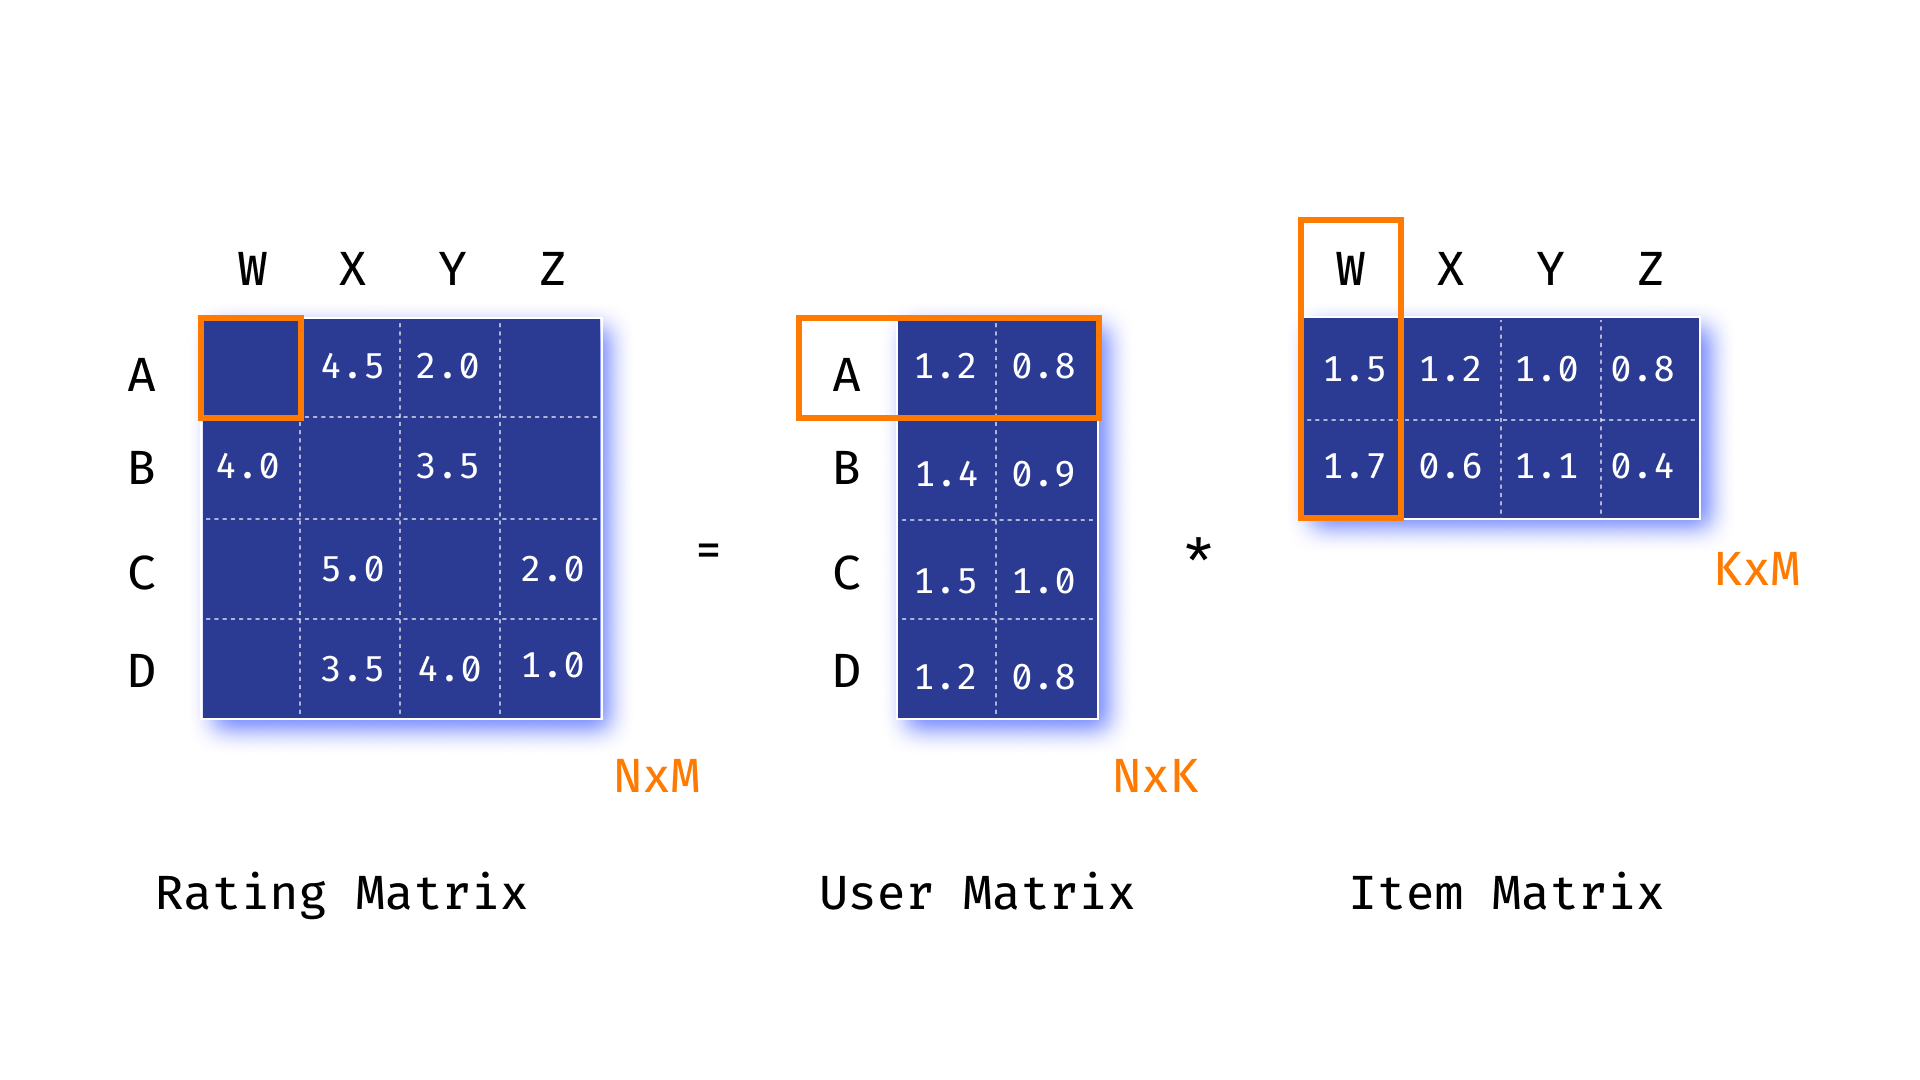

#### Сингулярное разложение (SVD)

На лекции, посвященной методам понижения размерности, Вы подробно рассматривали применение SVD разложения. Напомним как выглядит SVD разложение:

$$ R = U \Sigma V^T $$

где
* $U$ и $V$ – унитарные матрицы (т.е. $U U^T = U^T U = I$, а строки и столбцы образуют ортонормированный базис),
* $\Sigma$ – диагональная матрица, состоящая из сингулярных значений матрицы $R$.
На основе SVD-разложения строилось SVD-преобразование, позволяющее приближать матрицу $R$ при помощи низкомерных матриц $U_k, V_k, Σ_k$:
$$R ≈ \hat R = U_kΣ_kV_k^T$$
У сингулярного разложения есть очень важный факт – оно решает задачу минимизации, которую мы поставили выше:

$$ \left\|  R - U_k \Sigma_k V_k^T  \right\| _ 2 ^ 2 \longrightarrow \min\limits_{U_k, Σ_k, V_k} $$

Поэтому, обозначив матрицу $P = U_k \Sigma_k$, а матрицу $Q_k = V_k$, можно сразу получить решение задачи.



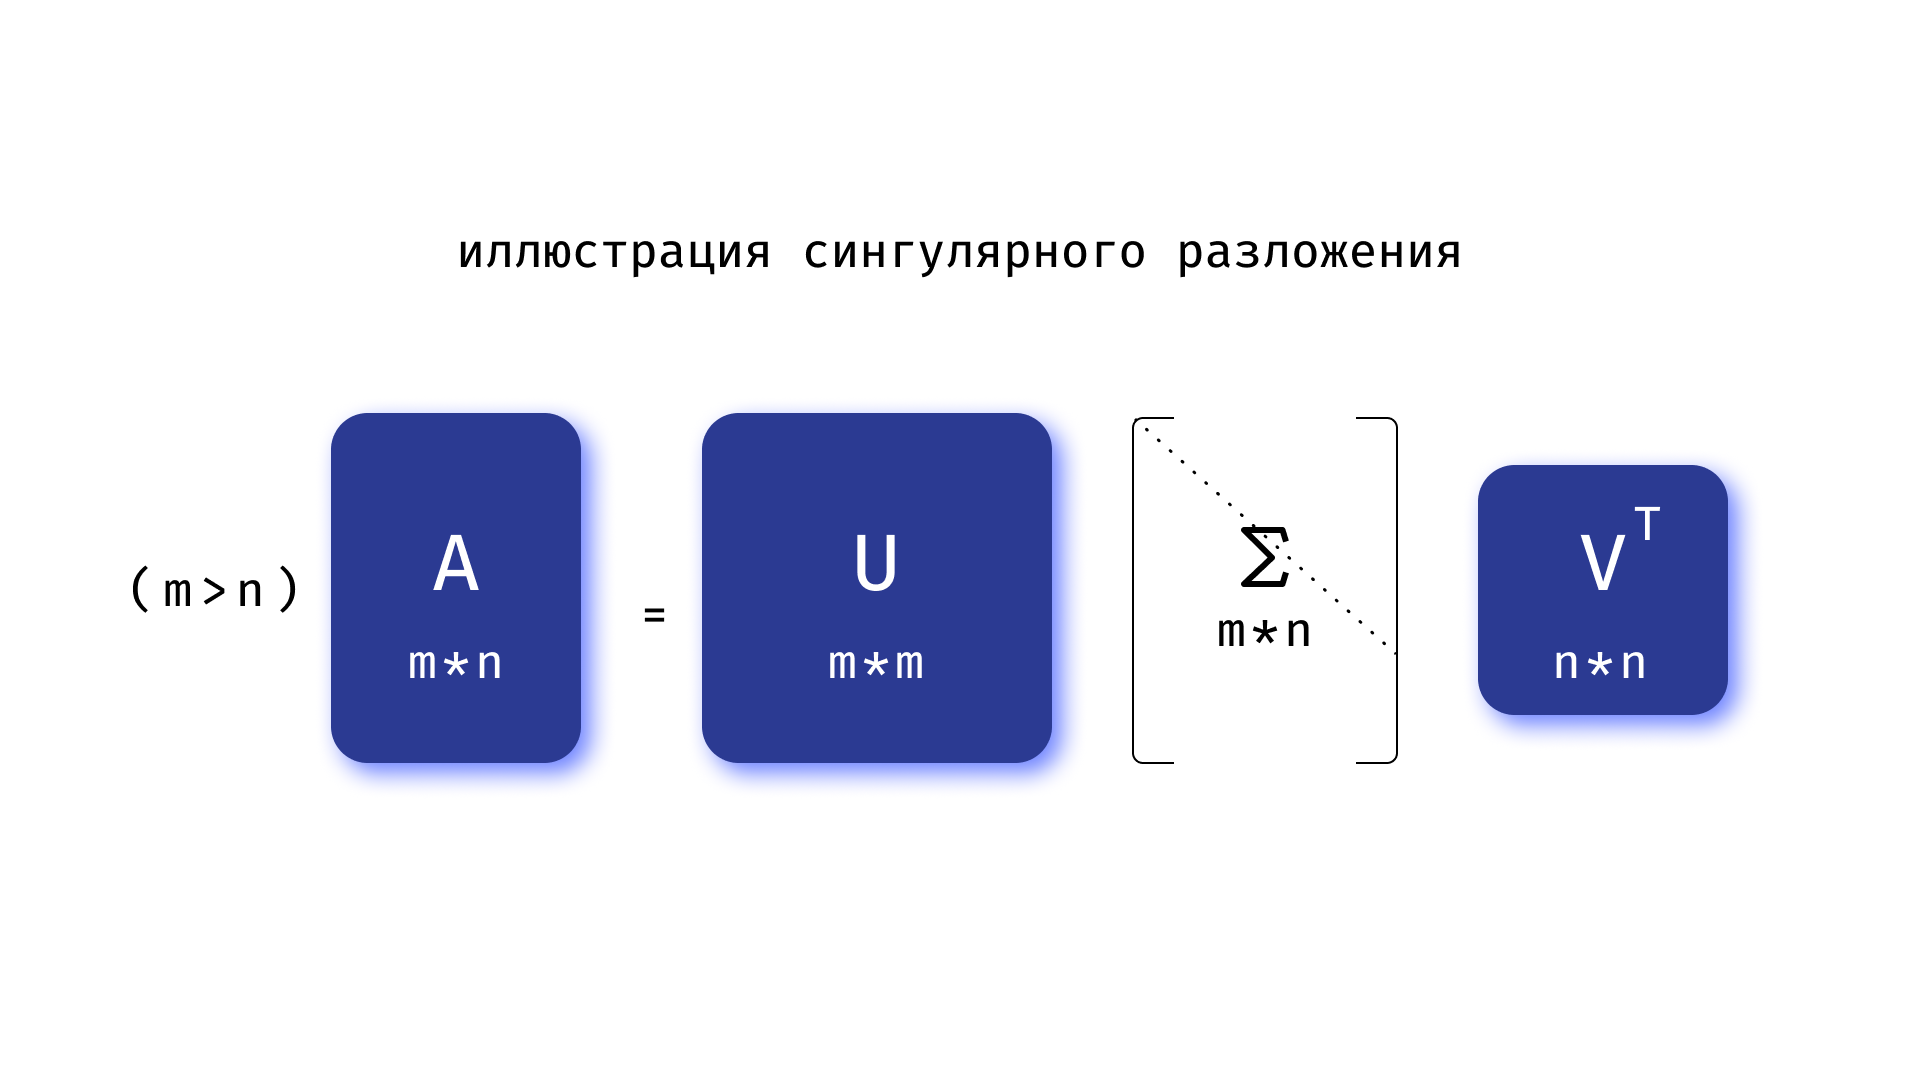


На практике SVD разложение нечасто применяется в качестве алгорима матричной факторизациии по той причине, что на больших матрицах cингулярное разложение работает очень-очень-очень долго. Это связано с тем, что для расчета матриц, участвующих в разложении, нужно найти собственные значения и собственные вектора для матриц $R R^T$ и $R^T R$, а это не очень простая с вычислительной точки зрения задача.

In [ ]:
import scipy
import scipy.sparse as sp

Дальше мы будем активно использовать механизм *разреженных матриц*. Мы уже упомянали о них в нашем курсе. Дело в том, что большинство оценок в матрице $R$ - отсутствуют. Это значит, что можно не хранить такую "пустую" информацию, а хранить лишь координаты заполненных ячеек и их значения. Механизм работы с таким представлением данных реализован в модуле `scipy.sparse`

In [ ]:
# Составим разреженную матрицу R, назовем ее X_ratings

X_ratings = sp.coo_matrix((ratings['rating'], (ratings['userId'], ratings['itemId'])), dtype=float)
X_ratings = X_ratings.tocsr()
X_ratings

<6041x3953 sparse matrix of type '<class 'numpy.float64'>'
	with 1000209 stored elements in Compressed Sparse Row format>

Для работы с svd разложением в случае sparse-матриц воспользуемся функцией `scipy.sparse.linalg.svds`. Функционально она не отличается от своего аналога в `numpy`. Задавая параметр k мы одновременно делаем svd-преобразование.

In [ ]:
# построим сингулярное разложение
from scipy.sparse.linalg import svds

U, s, Vh = svds(X_ratings, k=16)
P, Q = U @ np.diag(s), Vh.T

In [ ]:
# сколько чисел нужно хранить для вычисления приближенной матрицы R?

print('Размеры матрицы пользователей:', P.shape)
print('Размеры матрицы сущностей:', Q.shape)

Размеры матрицы пользователей: (6041, 16)
Размеры матрицы сущностей: (3953, 16)


Построим item2item рекомендатор на основе близости векторных представлений. Для этого мы можем воспользоваться классом `NearestNeighbors` из модуля `sklearn.neighbors`, который поможет нам отыскать наиболее похожие объекты.

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=31)
nn = nn.fit(Q)

In [ ]:
item_x = 2628   # Star Wars: Episode I - The Phantom Menace (1999)
#item_x = 1      # Toy Story (1995)

recos = nn.kneighbors(Q[[item_x], :], return_distance=False)[:, 1:].ravel()

print('Рекомендации для ', mapping_movies_name[item_x], ':', sep='')
print('=' * 60)

for i, item_y in enumerate(recos, 1):
    print('{:02d}\t{}'.format(i, mapping_movies_name[item_y]))

Рекомендации для Star Wars: Episode I - The Phantom Menace (1999):
01	Independence Day (ID4) (1996)
02	Fifth Element, The (1997)
03	Stargate (1994)
04	Star Trek: Generations (1994)
05	Starship Troopers (1997)
06	Star Trek VI: The Undiscovered Country (1991)
07	Star Trek: First Contact (1996)
08	Star Trek: Insurrection (1998)
09	Rocketeer, The (1991)
10	Armageddon (1998)
11	Lost World: Jurassic Park, The (1997)
12	Lost in Space (1998)
13	Flight of the Navigator (1986)
14	Deep Impact (1998)
15	Dragonheart (1996)
16	Judge Dredd (1995)
17	Johnny Mnemonic (1995)
18	Demolition Man (1993)
19	Predator 2 (1990)
20	Lawnmower Man, The (1992)
21	Star Trek V: The Final Frontier (1989)
22	Timecop (1994)
23	Bicentennial Man (1999)
24	Spawn (1997)
25	Waterworld (1995)
26	Congo (1995)
27	Universal Soldier (1992)
28	Godzilla (1998)
29	Hook (1991)
30	Super Mario Bros. (1993)


Мы также можем построить рекомендации для некоторого пользователя на основе вектора его предпочтений $p_u$.

Выберем какого-нибудь конкретного пользователя.

In [ ]:
# посмотрим на историю пользователя

user_id = 761   # Sci-Fi
#user_id = 4525  # War
#user_id = 5012  # Western
#user_id = 2160  # Comedy

pd.merge(ratings[ratings['userId'] == user_id], movies, on='itemId')

userId  itemId  rating         ts                                   name  \
0      761    1917       3  975450661                      Armageddon (1998)   
1      761    2916       5  975450679                    Total Recall (1990)   
2      761    2105       4  975450721                            Tron (1982)   
3      761    2028       5  975450740             Saving Private Ryan (1998)   
4      761    2582       5  975450755  Twin Dragons (Shuang long hui) (1992)   
5      761    3793       5  975451053                           X-Men (2000)   
6      761    3745       4  975451083                      Titan A.E. (2000)   
7      761    3147       5  975451166                 Green Mile, The (1999)   
8      761     780       5  975451188          Independence Day (ID4) (1996)   
9      761    2571       5  975451206                     Matrix, The (1999)   
10     761     924       5  975451234           2001: A Space Odyssey (1968)   
11     761    1590       4  975451258                   Event Horizon (1997)   
12     761    3948       4  975451290                Meet the Parents (2000)   
13     761    2706       5  975451319                    American Pie (1999)   
14     761    2325       5  975451333                         Orgazmo (1997)   
15     761    3578       5  975451346                       Gladiator (2000)   
16     761       1       4  975451381                       Toy Story (1995)   
17     761    3114       5  975451381                     Toy Story 2 (1999)   
18     761     589       5  975451405      Terminator 2: Judgment Day (1991)   
19     761    1240       3  975451413                 Terminator, The (1984)   

                                     tags  
0   [Action, Adventure, Sci-Fi, Thriller]  
1   [Action, Adventure, Sci-Fi, Thriller]  
2    [Action, Adventure, Fantasy, Sci-Fi]  
3                    [Action, Drama, War]  
4                        [Action, Comedy]  
5                        [Action, Sci-Fi]  
6          [Adventure, Animation, Sci-Fi]  
7                       [Drama, Thriller]  
8                   [Action, Sci-Fi, War]  
9              [Action, Sci-Fi, Thriller]  
10     [Drama, Mystery, Sci-Fi, Thriller]  
11    [Action, Mystery, Sci-Fi, Thriller]  
12                               [Comedy]  
13                               [Comedy]  
14                               [Comedy]  
15                        [Action, Drama]  
16        [Animation, Children's, Comedy]  
17        [Animation, Children's, Comedy]  
18             [Action, Sci-Fi, Thriller]  
19             [Action, Sci-Fi, Thriller]

In [ ]:
# построим рекомендации для этого пользователя
# Начнем с поиска оценок схожести фильма и пользователя, которые можно посчитать, как обычные скалярные произведения
P_user = P[[user_id], ]
recomendation_scores = (P_user @ Q.T)

# не забываем удалить то, что пользователь уже оценил
already_known = X_ratings[user_id].nonzero()
recomendation_scores[already_known] = -np.inf

# И найдём 30 самых подходящих фильмов
recos = np.argsort(recomendation_scores.ravel())[::-1][:30]

movies.set_index('itemId').loc[recos].reset_index()

itemId                                               name  \
0      480                               Jurassic Park (1993)   
1     1580                                Men in Black (1997)   
2      260          Star Wars: Episode IV - A New Hope (1977)   
3     2858                             American Beauty (1999)   
4     3753                                Patriot, The (2000)   
5      110                                  Braveheart (1995)   
6     2628   Star Wars: Episode I - The Phantom Menace (1999)   
7     2762                            Sixth Sense, The (1999)   
8     1210  Star Wars: Episode VI - Return of the Jedi (1983)   
9     1196  Star Wars: Episode V - The Empire Strikes Back...   
10    3175                                Galaxy Quest (1999)   
11    3751                                 Chicken Run (2000)   
12    1270                          Back to the Future (1985)   
13    3555                                       U-571 (2000)   
14    3481                               High Fidelity (2000)   
15    1584                                     Contact (1997)   
16    3408                             Erin Brockovich (2000)   
17    3510                                   Frequency (2000)   
18    3897                               Almost Famous (2000)   
19    3623                       Mission: Impossible 2 (2000)   
20    1356                    Star Trek: First Contact (1996)   
21    1527                          Fifth Element, The (1997)   
22    1214                                       Alien (1979)   
23    3755                          Perfect Storm, The (2000)   
24     457                               Fugitive, The (1993)   
25    3624                               Shanghai Noon (2000)   
26    1544              Lost World: Jurassic Park, The (1997)   
27    1200                                      Aliens (1986)   
28      32                              Twelve Monkeys (1995)   
29     593                   Silence of the Lambs, The (1991)   

                                         tags  
0                 [Action, Adventure, Sci-Fi]  
1         [Action, Adventure, Comedy, Sci-Fi]  
2        [Action, Adventure, Fantasy, Sci-Fi]  
3                             [Comedy, Drama]  
4                        [Action, Drama, War]  
5                        [Action, Drama, War]  
6        [Action, Adventure, Fantasy, Sci-Fi]  
7                                  [Thriller]  
8   [Action, Adventure, Romance, Sci-Fi, War]  
9     [Action, Adventure, Drama, Sci-Fi, War]  
10                [Adventure, Comedy, Sci-Fi]  
11            [Animation, Children's, Comedy]  
12                           [Comedy, Sci-Fi]  
13                         [Action, Thriller]  
14                                   [Comedy]  
15                            [Drama, Sci-Fi]  
16                                    [Drama]  
17                          [Drama, Thriller]  
18                            [Comedy, Drama]  
19                         [Action, Thriller]  
20                [Action, Adventure, Sci-Fi]  
21                           [Action, Sci-Fi]  
22         [Action, Horror, Sci-Fi, Thriller]  
23              [Action, Adventure, Thriller]  
24                         [Action, Thriller]  
25                                   [Action]  
26      [Action, Adventure, Sci-Fi, Thriller]  
27            [Action, Sci-Fi, Thriller, War]  
28                            [Drama, Sci-Fi]  
29                          [Drama, Thriller]

Как мы видим, такая система достаточно эффективна. Она способна распознать жанровые предпочтения пользователя и рекомендовать фильмы нужного жанра!

#### Alternating Least Square (ALS)

Теперь предположим, что мы ничего не знаем про сингулярное разложение. Как решать тогда такую задачу оптимизации?

$$ L = \sum\limits_{(u, i) \in R} \left( r_{ui} - \left\langle p_u, q_i \right\rangle \right)^2 \longrightarrow \min_{p_u, q_i} $$

Вы уже знакомы с методом стохастического градиентного спуска, поэтому знаете, что задачу можно решать итерационно, обновляя веса для $p_u$ и $q_i$ одновременно в направлении противоположному градиентам $\frac{\partial L}{\partial p_u}$ и $\frac{\partial L}{\partial q_i}$.

Однако, есть и другой способ решения данной задачи. Давайте зафиксируем векторы, например, пользователя $p_u$. Тогда мы имеем задачу оптимизации для линейной регрессии, где векторы сущностей $q_i$ выступают в качестве параметров линейной регрессии. Аналогично, при фиксации векторов $q_i$ имеем задачу оптимизации линейной регрессии с весами $p_u$.

Таким образом, задачу, сформулированную выше, можно свести к поочередной оптимизации линейной регрессии относительно $p_u$ и $q_i$. Этот алгоритм и называется ALS. На практике именно он и применяется в модели матричной факторизации на больших данных. Основными преимуществами данного алгоритма являются его простота (мы уже умеем хорошо решать задачу линейной регрессии) и возможность параллелизации.

Рассмотрим пример, в котором мы вновь будем строить рекомендации для некоторого пользователя.

In [ ]:
# посмотрим на историю пользователя

user_id = 761   # Sci-Fi
user_id = 4525  # War
user_id = 5012  # Western
#user_id = 2160  # Comedy

pd.merge(ratings[ratings['userId'] == user_id], movies, on='itemId')

userId  itemId  rating         ts  \
0     5012    1221       4  962583952   
1     5012    3253       2  962583952   
2     5012    2653       3  962583952   
3     5012    2628       4  962583970   
4     5012    1256       3  962583988   
5     5012     599       5  962584073   
6     5012    3508       4  962584073   
7     5012    2921       4  962584073   
8     5012    1266       4  962584073   
9     5012    3671       3  962584073   
10    5012    3037       3  962584105   
11    5012    2951       4  962584105   
12    5012    1283       4  962584105   
13    5012    3681       3  962584105   
14    5012    2527       2  962584127   
15    5012    3494       3  962584153   
16    5012     383       4  962584153   
17    5012    1008       3  962584187   
18    5012    2701       2  962584201   
19    5012    1304       4  962584244   

                                                name  \
0                     Godfather: Part II, The (1974)   
1                               Wayne's World (1992)   
2                              Son of Dracula (1943)   
3   Star Wars: Episode I - The Phantom Menace (1999)   
4                                   Duck Soup (1933)   
5                             Wild Bunch, The (1969)   
6                     Outlaw Josey Wales, The (1976)   
7                         High Plains Drifter (1972)   
8                                  Unforgiven (1992)   
9                             Blazing Saddles (1974)   
10                             Little Big Man (1970)   
11                      Fistful of Dollars, A (1964)   
12                                  High Noon (1952)   
13                     For a Few Dollars More (1965)   
14                                  Westworld (1973)   
15                                  True Grit (1969)   
16                                 Wyatt Earp (1994)   
17   Davy Crockett, King of the Wild Frontier (1955)   
18                             Wild Wild West (1999)   
19         Butch Cassidy and the Sundance Kid (1969)   

                                    tags  
0                 [Action, Crime, Drama]  
1                               [Comedy]  
2                               [Horror]  
3   [Action, Adventure, Fantasy, Sci-Fi]  
4                          [Comedy, War]  
5                              [Western]  
6                              [Western]  
7                              [Western]  
8                              [Western]  
9                      [Comedy, Western]  
10              [Comedy, Drama, Western]  
11                     [Action, Western]  
12                             [Western]  
13                             [Western]  
14   [Action, Sci-Fi, Thriller, Western]  
15                  [Adventure, Western]  
16                             [Western]  
17                             [Western]  
18             [Action, Sci-Fi, Western]  
19             [Action, Comedy, Western]

Алгоритм ALS мы возьмём из модуля `als` библиотеки `implicit`. `implicit` - это еще одна популярная библиотека для работы с рекомендательными системами и коллаборативной фильтрации.

Интерфейс ALS в этой библиотеке очень близок к стандартному интерфейсу моделей из `sklearn`. Мы можем вызвать функцию `.fit()`, которая реализует описанный выше алгоритм подбора векторов `p_u` и `q_i` размерности, которая задаётся параметров `factors`

In [ ]:
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(factors=16)
model.fit(X_ratings)

  0%|          | 0/15 [00:00<?, ?it/s]

Построим рекомендации при помощи вызова функции `recommend()`.

In [ ]:
recos, _ = model.recommend(user_id, X_ratings[user_id], N=30, filter_already_liked_items=True)

movies.set_index('itemId').loc[recos].reset_index()

itemId                                      name  \
0     1201    Good, The Bad and The Ugly, The (1966)   
1     2944                   Dirty Dozen, The (1967)   
2     1262                  Great Escape, The (1963)   
3     3654              Guns of Navarone, The (1961)   
4     3062                   Longest Day, The (1962)   
5     3836                     Kelly's Heroes (1970)   
6     1272                             Patton (1970)   
7     2949                             Dr. No (1962)   
8     1250      Bridge on the River Kwai, The (1957)   
9     1953             French Connection, The (1971)   
10    2947                         Goldfinger (1964)   
11    1287                            Ben-Hur (1959)   
12    3366                  Where Eagles Dare (1969)   
13    2948              From Russia with Love (1963)   
14    3196                          Stalag 17 (1953)   
15    2922                      Hang 'em High (1967)   
16    1204                 Lawrence of Arabia (1962)   
17    3035                     Mister Roberts (1955)   
18    1294                            M*A*S*H (1970)   
19    2993                        Thunderball (1965)   
20    3365                     Searchers, The (1956)   
21    1263                   Deer Hunter, The (1978)   
22    2670               Run Silent, Run Deep (1958)   
23    3639       Man with the Golden Gun, The (1974)   
24    3074                   Jeremiah Johnson (1972)   
25     913                Maltese Falcon, The (1941)   
26    2401                         Pale Rider (1985)   
27    1254  Treasure of the Sierra Madre, The (1948)   
28    1276                     Cool Hand Luke (1967)   
29    3682                       Magnum Force (1973)   

                                tags  
0                  [Action, Western]  
1                      [Action, War]  
2                   [Adventure, War]  
3               [Action, Drama, War]  
4               [Action, Drama, War]  
5              [Action, Comedy, War]  
6                       [Drama, War]  
7                           [Action]  
8                       [Drama, War]  
9   [Action, Crime, Drama, Thriller]  
10                          [Action]  
11        [Action, Adventure, Drama]  
12          [Action, Adventure, War]  
13                          [Action]  
14                      [Drama, War]  
15                         [Western]  
16                  [Adventure, War]  
17              [Comedy, Drama, War]  
18                     [Comedy, War]  
19                          [Action]  
20                         [Western]  
21                      [Drama, War]  
22                             [War]  
23                          [Action]  
24                         [Western]  
25              [Film-Noir, Mystery]  
26                         [Western]  
27                       [Adventure]  
28                   [Comedy, Drama]  
29                         [Western]

Теперь у нас есть векторные представления для пользователей и сущностей. Имеет смысл попробовать их визуализировать и на основании этого попробовать сделать выводы об адекватности получившейся модели.

Наши векторы имеют размерность 16, поэтому для отображения на плоскости нам понадобятся методы понижения размерности. Предлагается использовать метод t-SNE, который Вы изучали на одном из прошлых занятий. Дополнительно можно выполнить кластеризацию, чтобы визуализация была чуть более наглядной. В качестве метода кластеризации будем использовать алгоритм KMeans.

In [ ]:
# векторные представления для сущностей (фильмов)
item_embeddings = model.item_factors[movies['itemId']]
item_embeddings.shape

(3883, 16)

KMeans возьмем из `sklearn`

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13, n_init=10, max_iter=300, random_state=56)
clusters = kmeans.fit_predict(item_embeddings)

In [ ]:
from sklearn.manifold import TSNE
# Воспользуемся алгоритмом t-SNE
tsne = TSNE(n_jobs=8, method='exact', perplexity=30, learning_rate=150, n_iter=1000,
            random_state=9876, verbose=1000)

item_embeddings_tsne = tsne.fit_transform(item_embeddings)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 3883
[t-SNE] Computed conditional probabilities for sample 2000 / 3883
[t-SNE] Computed conditional probabilities for sample 3000 / 3883
[t-SNE] Computed conditional probabilities for sample 3883 / 3883
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 50: error = 83.6373600, gradient norm = 0.0046805 (50 iterations in 21.436s)
[t-SNE] Iteration 100: error = 78.0695222, gradient norm = 0.0030762 (50 iterations in 21.857s)
[t-SNE] Iteration 150: error = 77.7071445, gradient norm = 0.0017145 (50 iterations in 21.491s)
[t-SNE] Iteration 200: error = 77.6212714, gradient norm = 0.0004109 (50 iterations in 22.535s)
[t-SNE] Iteration 250: error = 77.6193607, gradient norm = 0.0001290 (50 iterations in 21.998s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.619361
[t-SNE] Iteration 300: error = 1.8616646, gradient norm = 0.0012801 (50 iterations in 25.392s)
[t-SNE] Iterati

_____________________________
Ещё одна полезная библиотека, на это раз для визуализаций, - `plotly`. Вы могли слышать о ней раньше. Вообще для визуализации данных в питоне активно применяются 3 библиотеки: `matplotlib`, `seaborn` и `plotly`. Последняя интересна нам тем, что создает интерактивные дашборды. Библиотека `plotly` немного сложнее в использовании, чем `matplotlib`. Если Вам интересно ознакомиться с `plotly` подробнее, мы предлагаем Вам почитать [туториал](https://plotly.com/python/getting-started/)
_____________________________

In [ ]:
# визуализируем векторные представления и кластеризацию с помощью библиотеки plotly

import plotly.graph_objects as go

fig = go.Figure()

hovertext = movies['name'] + '; ' + movies['tags'].map(repr)
for i in range(kmeans.n_clusters):
    mask_cl = np.where(clusters == i)[0]
    fig.add_trace(go.Scattergl(
        x=item_embeddings_tsne[mask_cl, 0],
        y=item_embeddings_tsne[mask_cl, 1],
        hovertext=hovertext[mask_cl],
        mode='markers',
        marker=dict(
            # line=dict(width=1, color='white'),
        ),
        showlegend=True,
        name='cluster_{}'.format(i),
    ))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)

fig.layout.template = 'plotly_white'

fig.show()

### Выводы

Что мы видим на этой картинке?

Мы видим, что даже в двумерной проекции предпочтений пользователей прослеживаются определённые закономерности. Тут есть явно выделенные кластеры, обнаруженные алгоритмом кластеризации. Это говорит о том, что наш подход для формирования многомерных векторных представлений вкусов пользователей способен выделять подмножества пользователей, чьи вкусы близки или же вообще совпадают. Эта похожесть может напоминать жанровые предпочтения или что-то другое, но в любом случае она выделяется в виде кластеров.

Значит, такие векторы несут в себе достаточно информации для построения на их основе рекомендательных систем.

# Другие вопросы качества рекомендаций

Помимо выбора алгоритмов для решения задачи построения кандидатов есть много других вопросов, с которыми нам приходится сталкиваться:

1. Как обосновывать рекомендации?
2. Как бороться с проблемой холодного старта?
3. Как бороться с popularity bias (популярностью некоторых items)?
4. Как учитывать неявные предпочтения пользователю?
5. Как помогать пользователю выбираться из «пузыря»?
6. Как учитывать связи между пользователями?